In [8]:
import pandas as pd
import numpy as np
import os
import re
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy.sparse import hstack

# 1. 데이터 병합 과정

### 수행 내용
- 분할되어있는 초기 데이터를 하나로 병합
- 분석 데이터 폴더로 저장

In [2]:
def merge_file(input_folder, output_file):
  excel_files = []

  for file in os.listdir(input_folder):
    if file.endswith(".xlsx"):

      match = re.search(r'NewsResult_(\d{8})', file)
      if match:
        date = match.group(1)
        excel_files.append((file, date))

  excel_files.sort(key=lambda x: x[1])

  all_dataframes = []
  for file, date in excel_files:
    file_path = os.path.join(input_folder, file)
    df = pd.read_excel(file_path)
    all_dataframes.append(df)

  merged_df = pd.concat(all_dataframes, ignore_index=True)

  merged_df.to_csv(output_file, index=False, encoding='utf-8-sig')
  print(f"병합된 파일이 {output_file}로 저장되었습니다.")


input_folder = "/content/drive/MyDrive/빅데이터_최종과제/초기 데이터"
output_file = "/content/drive/MyDrive/빅데이터_최종과제/분석 데이터/분석 데이터.csv"
merge_file(input_folder, output_file)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

병합된 파일이 /content/drive/MyDrive/빅데이터_최종과제/분석 데이터/분석 데이터.csv로 저장되었습니다.


# 2. 전처리 과정
### 전처리 내용
- 필요한 데이터(일자, 통합 분류, 키워드 컬럼) 추출 및 월별 분할
- 런타임 시간을 고려하여 분할된 데이터는 '분석 데이터(전처리 1)' 폴더에 별도 csv 파일로 저장

In [3]:
def preprocessing_data(input_file, output_folder):
  df = pd.read_csv(input_file)

  columns_to_extract = ['일자', '통합 분류1', '통합 분류2', '통합 분류3', '키워드']
  df = df[columns_to_extract]

  df['월'] = df['일자'].astype(str).str[:6]

  unique_months = df['월'].unique()
  for month in unique_months:
    monthly_data = df[df['월'] == month]
    output_file = os.path.join(output_folder, f"{month}_extracted.csv")
    monthly_data.to_csv(output_file, index=False, encoding='utf-8-sig')
    print(f"{output_file}로 저장되었습니다.")


input_file = "/content/drive/MyDrive/빅데이터_최종과제/분석 데이터/분석 데이터.csv"
output_folder = "/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)"
os.makedirs(output_folder, exist_ok=True)
preprocessing_data(input_file, output_folder)

/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202203_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202202_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202205_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202204_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202209_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202208_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202207_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202206_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202212_extracted.csv로 저장되었습니다.
/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/202211_extracted.csv로 저장되었습니다.
/content/d

# 3. EDA
### 수행 내용
- 월별 기사 개수, 월별 키워드 사용 빈도, 월별 사용 빈도가 가장 높은 키워드 10개를 확인
- 사용 빈도가 가장 높은 키워드 10개는 막대그래프로 시각화
<br><br>
### 주의 사항
- Matplotlib 사용 시 한글 폰트가 깨지므로, 이에 대한 대책이 필요 -> 나눔고딕 폰트 설치

In [12]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (23.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123634 files and direc

202202 - 기사 개수: 2937
202202 - 상위 10개 키워드:
  우크라이나: 22421회
  러시아: 22252회
  대통령: 8082회
  전쟁: 6596회
  후보: 6468회
  침공: 6226회
  미국: 5681회
  푸틴: 4677회
  제재: 4271회
  이날: 2954회


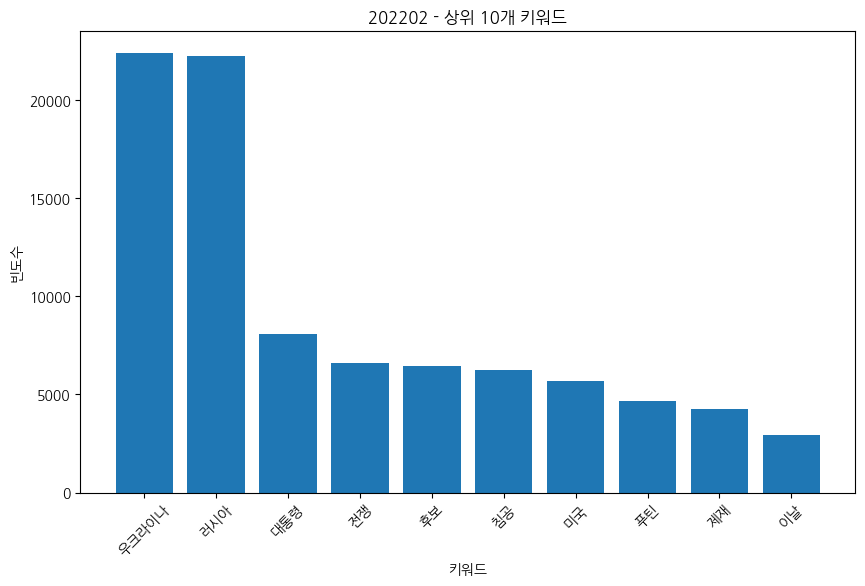

202203 - 기사 개수: 13439
202203 - 상위 10개 키워드:
  러시아: 87758회
  우크라이나: 79114회
  전쟁: 31556회
  대통령: 25768회
  미국: 25756회
  침공: 18686회
  푸틴: 15443회
  중국: 14775회
  러시아군: 13094회
  세계: 12113회


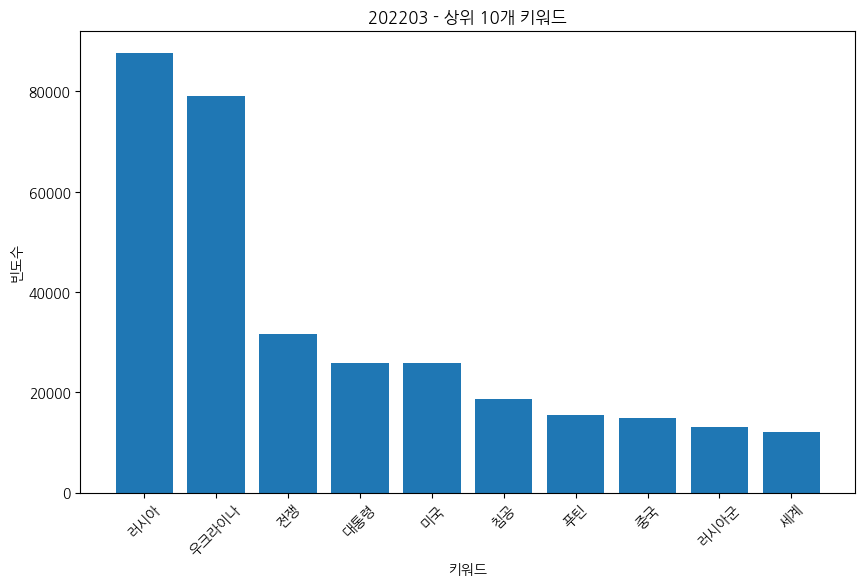

202204 - 기사 개수: 8659
202204 - 상위 10개 키워드:
  러시아: 45013회
  우크라이나: 41931회
  전쟁: 20906회
  미국: 16321회
  대통령: 15289회
  가격: 10768회
  러시아군: 9550회
  상승: 8541회
  푸틴: 7965회
  경제: 7916회


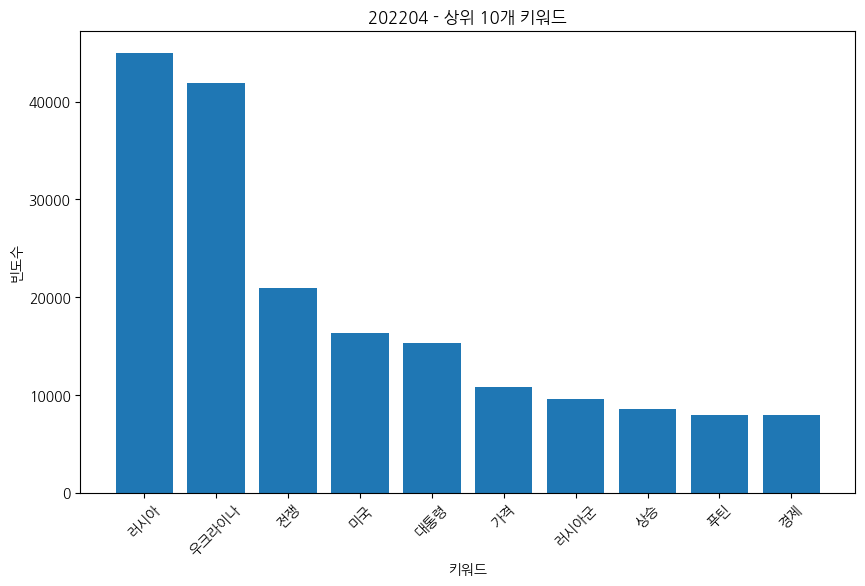

202205 - 기사 개수: 6580
202205 - 상위 10개 키워드:
  러시아: 30624회
  우크라이나: 28359회
  전쟁: 15193회
  미국: 13153회
  대통령: 11231회
  가격: 9519회
  중국: 7539회
  세계: 7496회
  푸틴: 6263회
  정부: 6175회


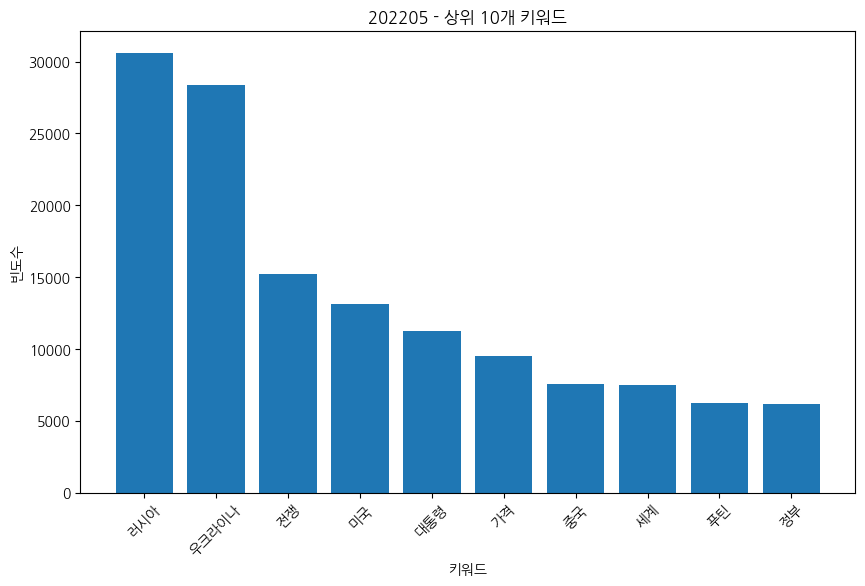

202206 - 기사 개수: 5767
202206 - 상위 10개 키워드:
  러시아: 24742회
  우크라이나: 23538회
  전쟁: 13208회
  미국: 10810회
  대통령: 9437회
  가격: 8766회
  중국: 7011회
  상승: 6058회
  경제: 6003회
  세계: 5975회


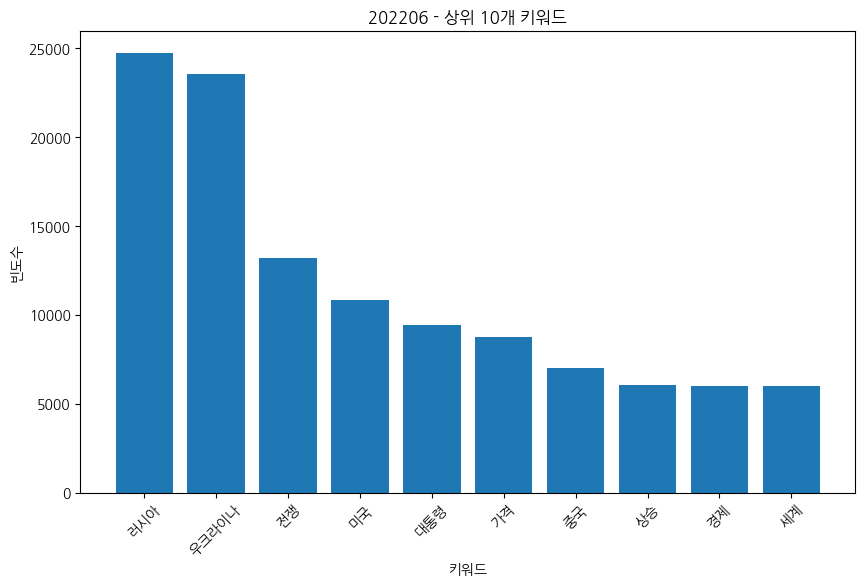

202207 - 기사 개수: 4852
202207 - 상위 10개 키워드:
  러시아: 17256회
  우크라이나: 15709회
  전쟁: 9649회
  미국: 9102회
  가격: 7363회
  중국: 6468회
  경제: 6165회
  대통령: 5706회
  상승: 5228회
  달러: 5047회


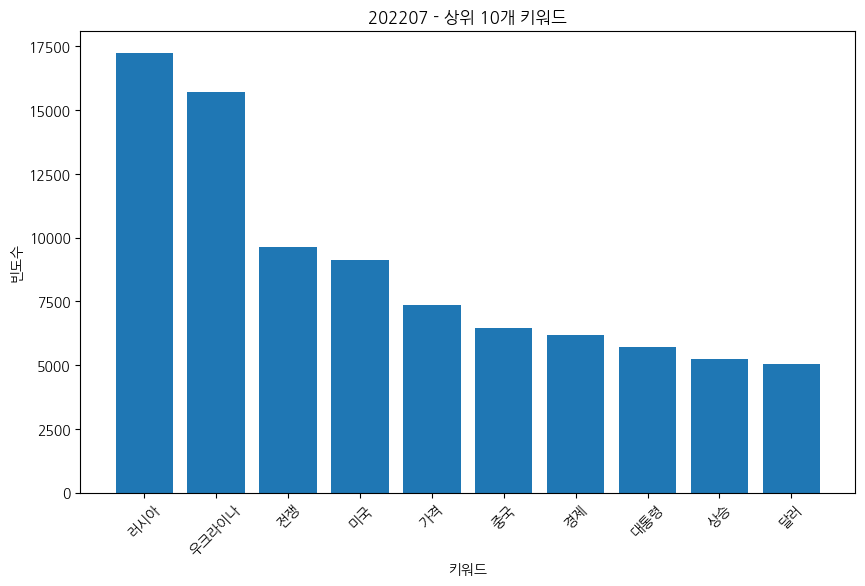

202208 - 기사 개수: 3887
202208 - 상위 10개 키워드:
  러시아: 16254회
  우크라이나: 14070회
  미국: 8390회
  전쟁: 7840회
  중국: 6417회
  가격: 6140회
  대통령: 4504회
  달러: 4272회
  세계: 4018회
  정부: 3929회


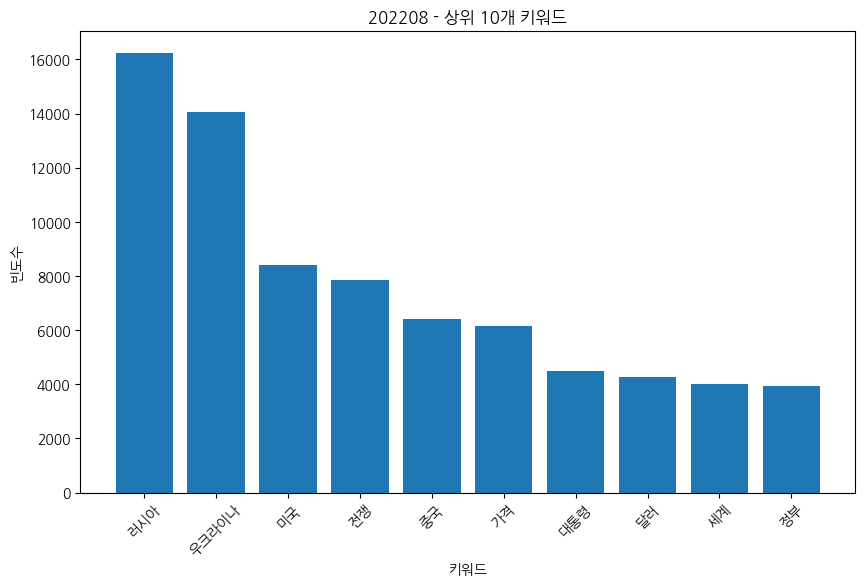

202209 - 기사 개수: 4501
202209 - 상위 10개 키워드:
  러시아: 26328회
  우크라이나: 15847회
  전쟁: 10162회
  대통령: 9369회
  미국: 9306회
  푸틴: 6727회
  중국: 6048회
  에너지: 5094회
  가격: 5049회
  정부: 4621회


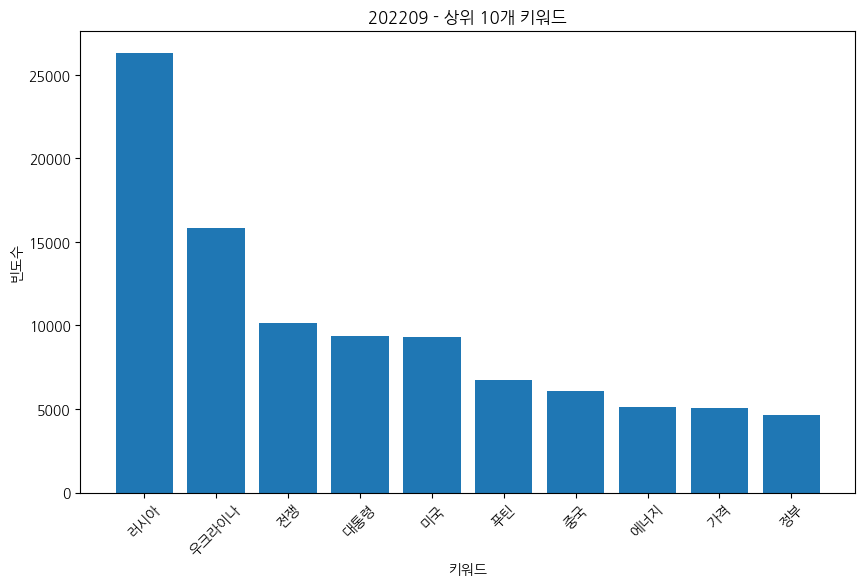

202210 - 기사 개수: 4940
202210 - 상위 10개 키워드:
  러시아: 24912회
  우크라이나: 18867회
  미국: 11464회
  전쟁: 9469회
  대통령: 8850회
  푸틴: 5933회
  중국: 5392회
  경제: 5089회
  상황: 5076회
  정부: 4908회


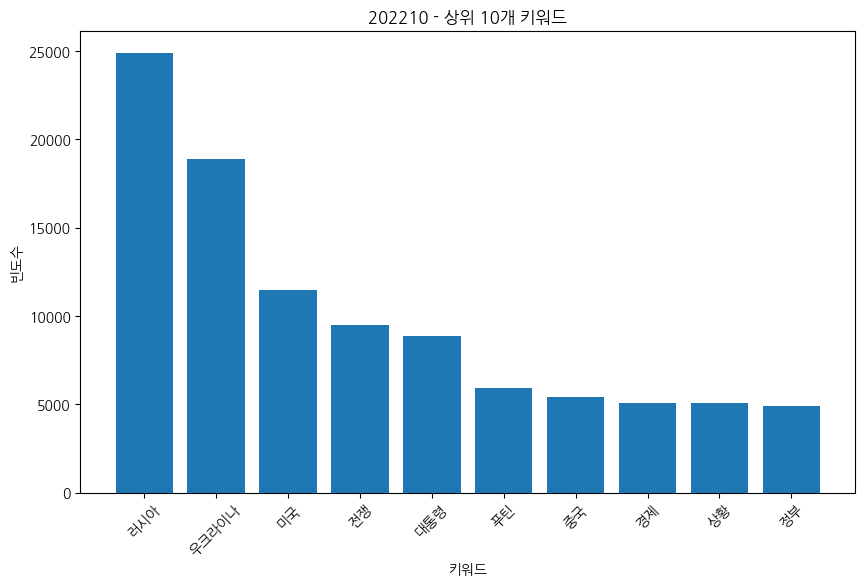

202211 - 기사 개수: 3909
202211 - 상위 10개 키워드:
  러시아: 17571회
  우크라이나: 14620회
  미국: 9438회
  전쟁: 8016회
  대통령: 6563회
  중국: 5740회
  경제: 4734회
  북한: 4134회
  미사일: 4133회
  가격: 3941회


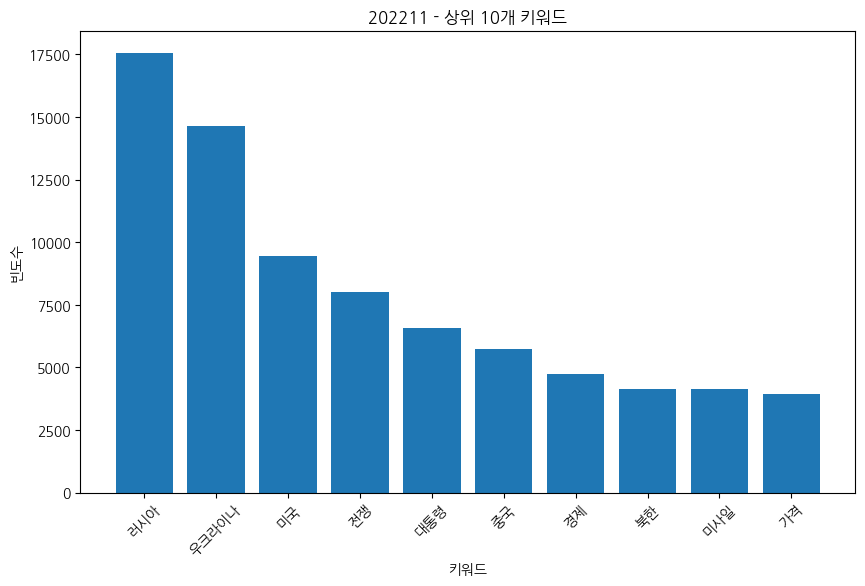

202212 - 기사 개수: 4297
202212 - 상위 10개 키워드:
  러시아: 19081회
  우크라이나: 15860회
  대통령: 10291회
  전쟁: 9709회
  미국: 9517회
  푸틴: 5348회
  내년: 5200회
  중국: 5179회
  가격: 5078회
  지원: 4537회


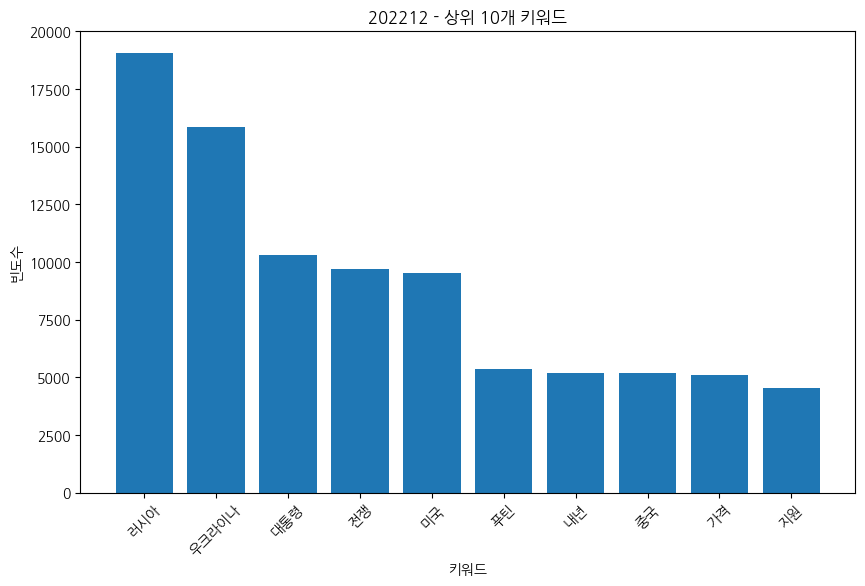

202301 - 기사 개수: 4549
202301 - 상위 10개 키워드:
  러시아: 16461회
  우크라이나: 15963회
  전쟁: 9506회
  미국: 9188회
  지원: 6887회
  중국: 5888회
  대통령: 5871회
  경제: 5528회
  정부: 5526회
  가격: 5376회


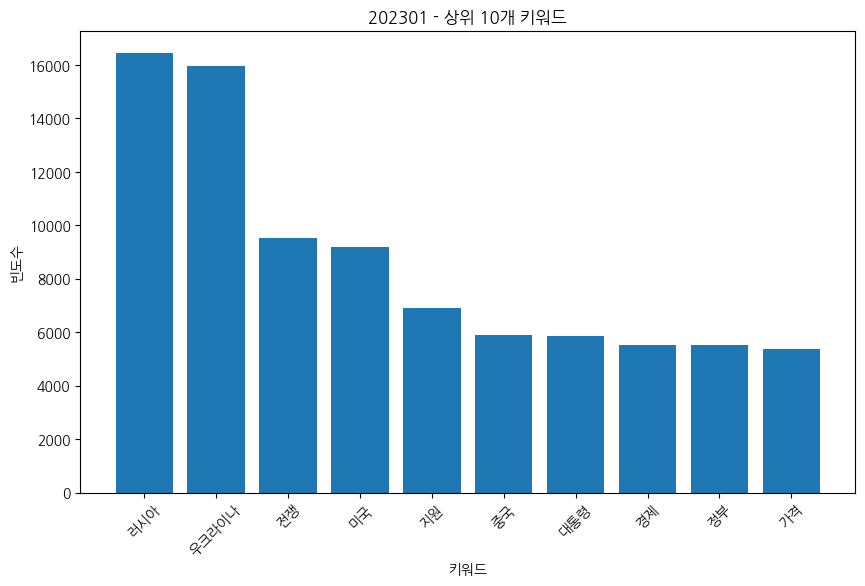

202302 - 기사 개수: 4784
202302 - 상위 10개 키워드:
  러시아: 25898회
  우크라이나: 24273회
  전쟁: 15068회
  미국: 11469회
  대통령: 11064회
  중국: 10265회
  지원: 9550회
  푸틴: 4686회
  정부: 4610회
  가격: 4525회


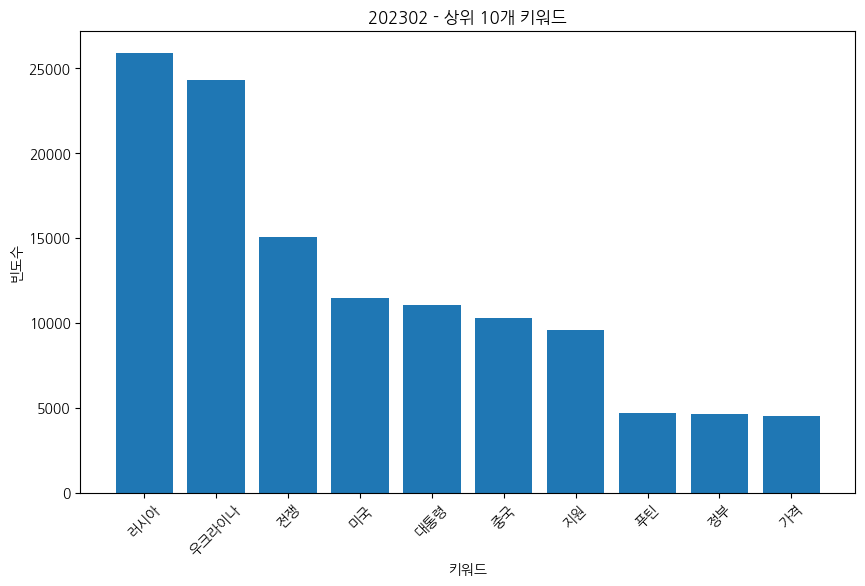

202303 - 기사 개수: 3571
202303 - 상위 10개 키워드:
  러시아: 18840회
  우크라이나: 14649회
  중국: 10008회
  미국: 8871회
  전쟁: 8396회
  대통령: 7077회
  푸틴: 4701회
  지원: 4001회
  정부: 3565회
  한국: 3080회


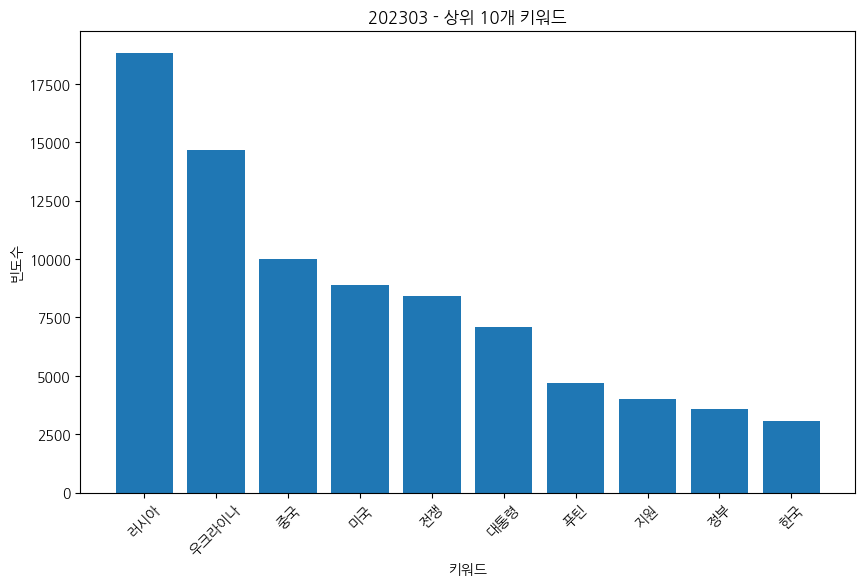

202304 - 기사 개수: 3977
202304 - 상위 10개 키워드:
  러시아: 16708회
  미국: 14719회
  우크라이나: 14526회
  대통령: 14188회
  중국: 10461회
  전쟁: 8245회
  지원: 8080회
  한국: 7522회
  정부: 5625회
  무기: 5072회


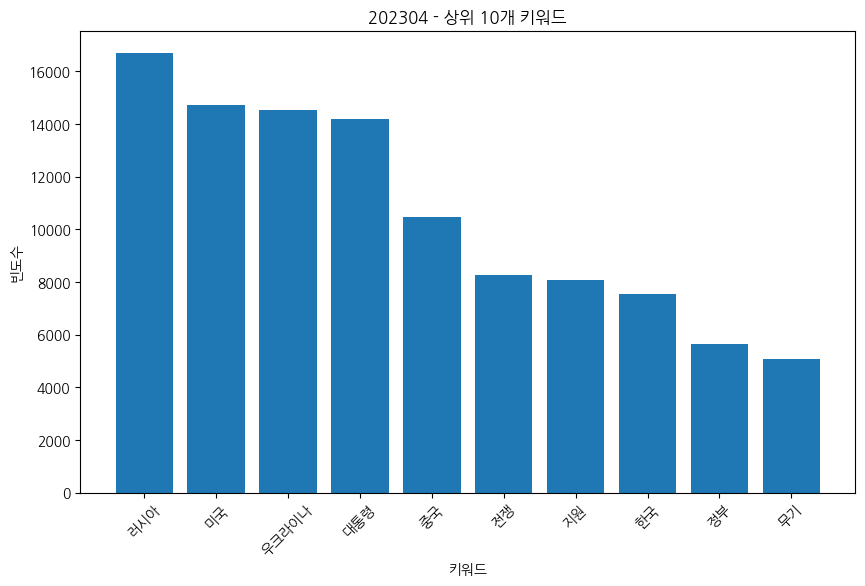

202305 - 기사 개수: 3403
202305 - 상위 10개 키워드:
  러시아: 16871회
  우크라이나: 15567회
  대통령: 9955회
  미국: 7682회
  중국: 7549회
  전쟁: 7155회
  지원: 4739회
  한국: 4052회
  정부: 3992회
  정상: 3248회


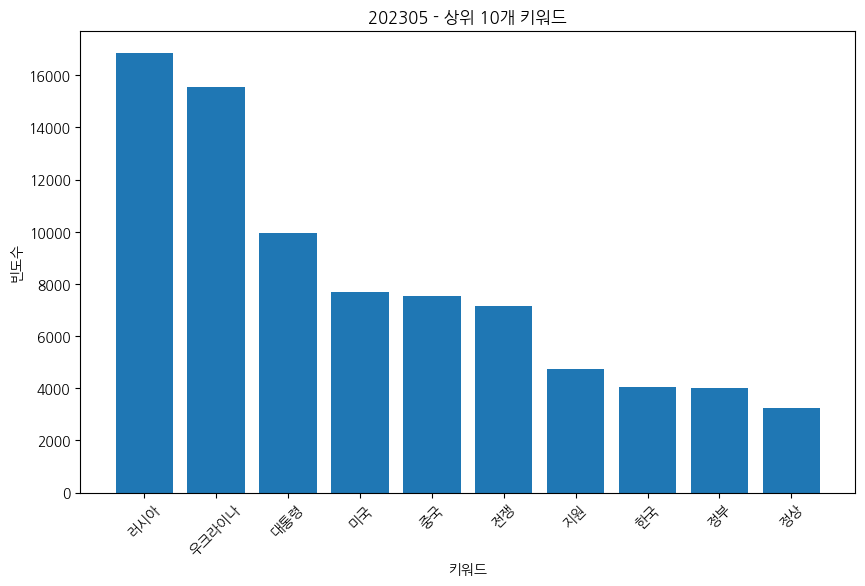

202306 - 기사 개수: 3342
202306 - 상위 10개 키워드:
  러시아: 18876회
  우크라이나: 13761회
  대통령: 8242회
  미국: 7213회
  전쟁: 7014회
  푸틴: 6038회
  중국: 5330회
  프리고진: 4084회
  가격: 4056회
  정부: 4032회


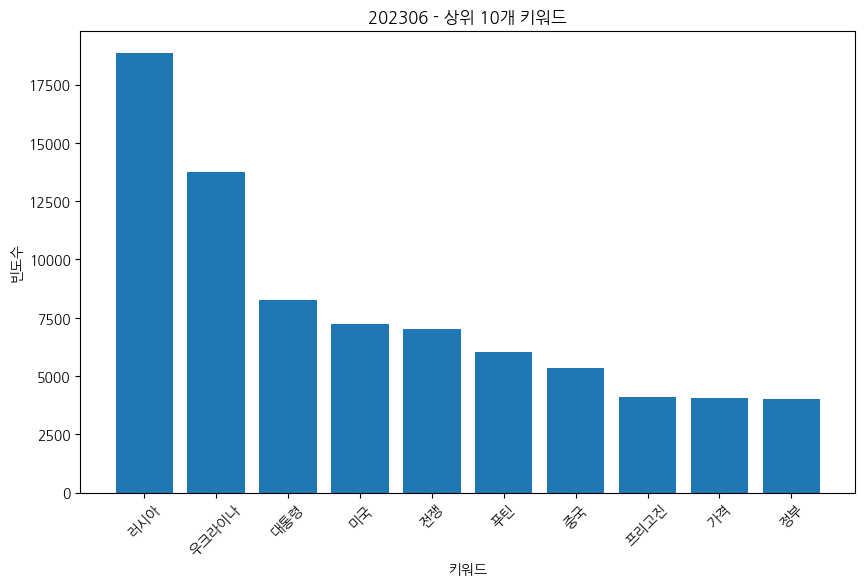

202307 - 기사 개수: 3609
202307 - 상위 10개 키워드:
  우크라이나: 19264회
  러시아: 18435회
  대통령: 12491회
  전쟁: 7931회
  미국: 7189회
  중국: 5860회
  지원: 5499회
  나토: 5437회
  북한: 4421회
  한국: 3923회


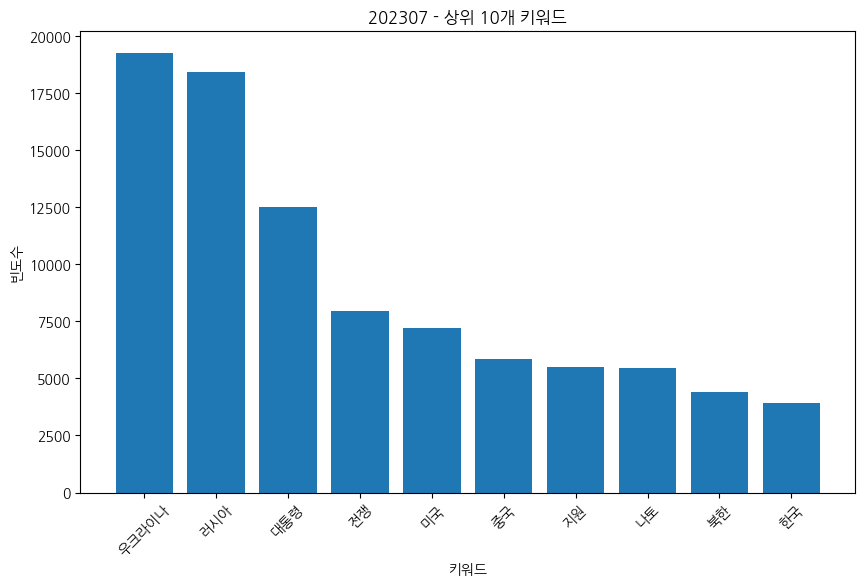

202308 - 기사 개수: 2496
202308 - 상위 10개 키워드:
  러시아: 12970회
  우크라이나: 9586회
  미국: 5853회
  전쟁: 5236회
  중국: 4498회
  대통령: 4284회
  북한: 3548회
  공격: 2706회
  정부: 2680회
  경제: 2407회


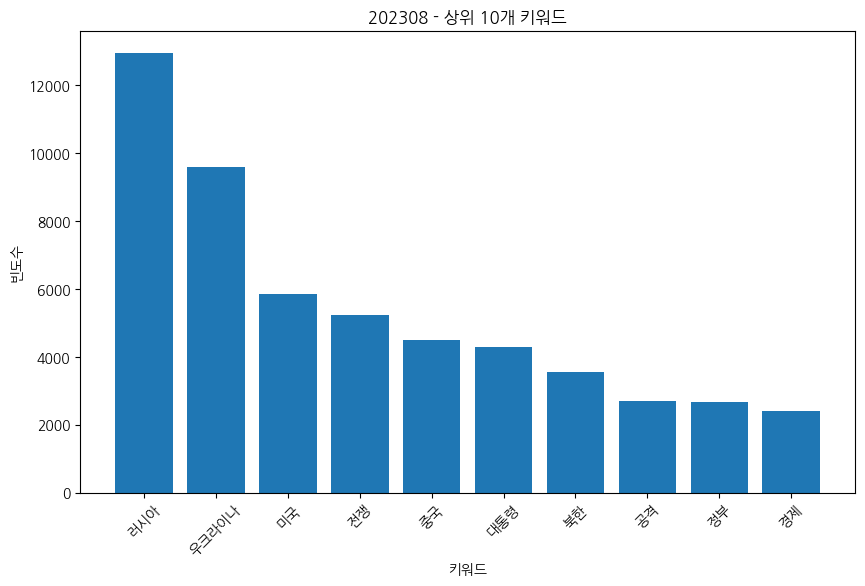

202309 - 기사 개수: 3864
202309 - 상위 10개 키워드:
  러시아: 26330회
  북한: 16015회
  우크라이나: 13594회
  대통령: 11899회
  미국: 10122회
  전쟁: 8557회
  중국: 8022회
  무기: 6840회
  푸틴: 6223회
  지원: 5821회


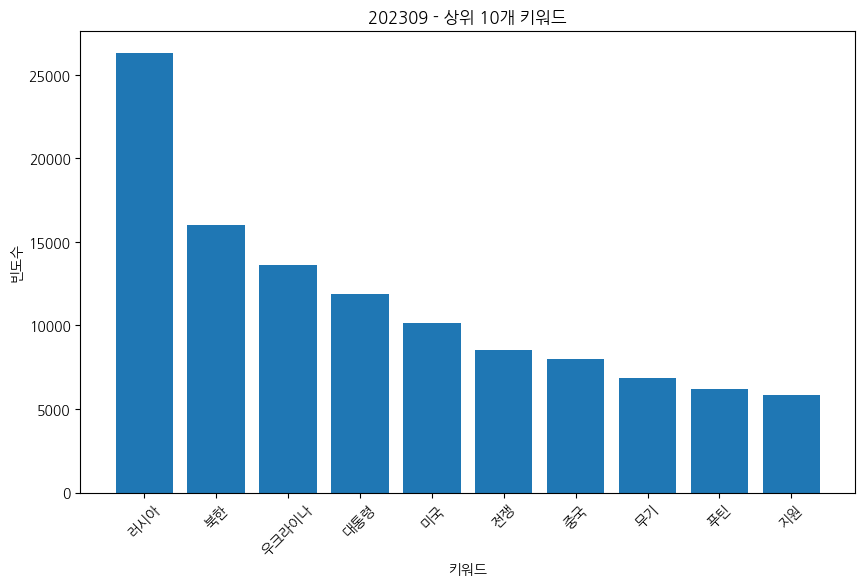

202310 - 기사 개수: 2765
202310 - 상위 10개 키워드:
  러시아: 9854회
  전쟁: 8793회
  이스라엘: 8788회
  미국: 8611회
  우크라이나: 7754회
  하마스: 5019회
  대통령: 4966회
  중국: 4906회
  지원: 4073회
  정부: 3995회


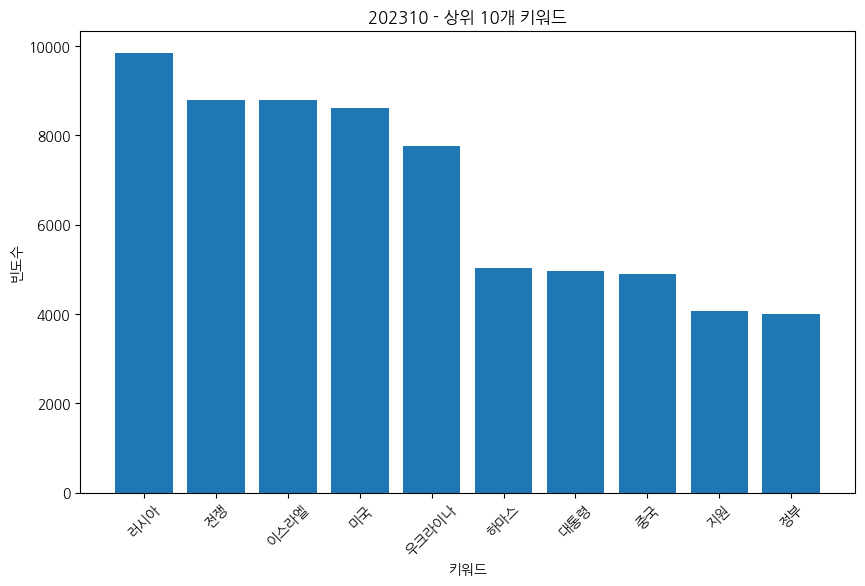

202311 - 기사 개수: 2468
202311 - 상위 10개 키워드:
  러시아: 8371회
  미국: 7230회
  전쟁: 6904회
  우크라이나: 6435회
  중국: 5252회
  북한: 5155회
  대통령: 4814회
  이스라엘: 3654회
  경제: 2861회
  정부: 2801회


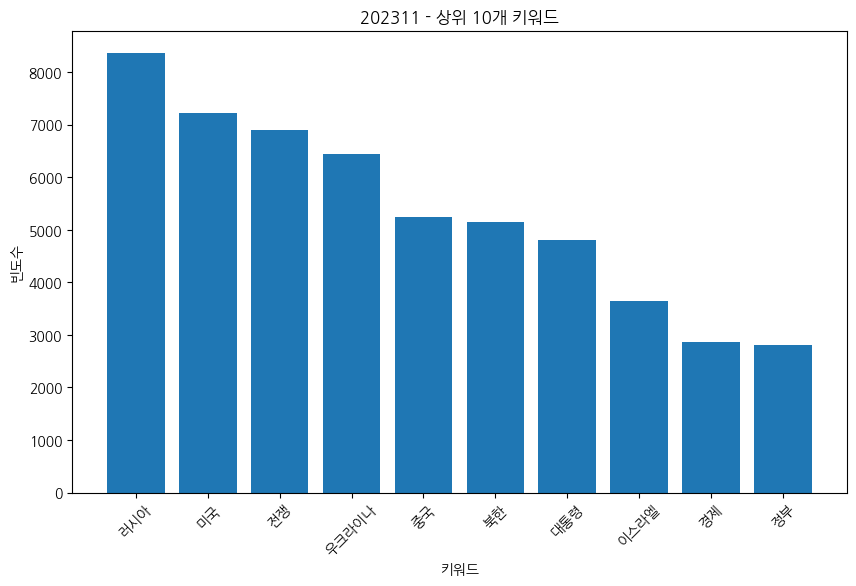

202312 - 기사 개수: 2407
202312 - 상위 10개 키워드:
  러시아: 10817회
  우크라이나: 9973회
  미국: 7022회
  전쟁: 6358회
  대통령: 4977회
  지원: 3961회
  중국: 3211회
  한국: 2769회
  경제: 2749회
  내년: 2610회


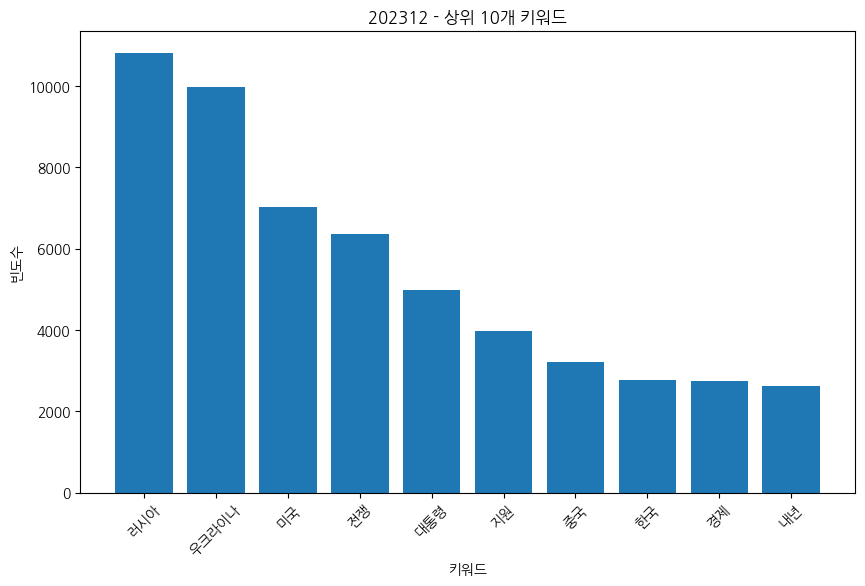

202401 - 기사 개수: 2458
202401 - 상위 10개 키워드:
  러시아: 10376회
  우크라이나: 7717회
  미국: 7553회
  북한: 7147회
  전쟁: 6458회
  대통령: 4220회
  중국: 4101회
  경제: 3100회
  세계: 3014회
  미사일: 2956회


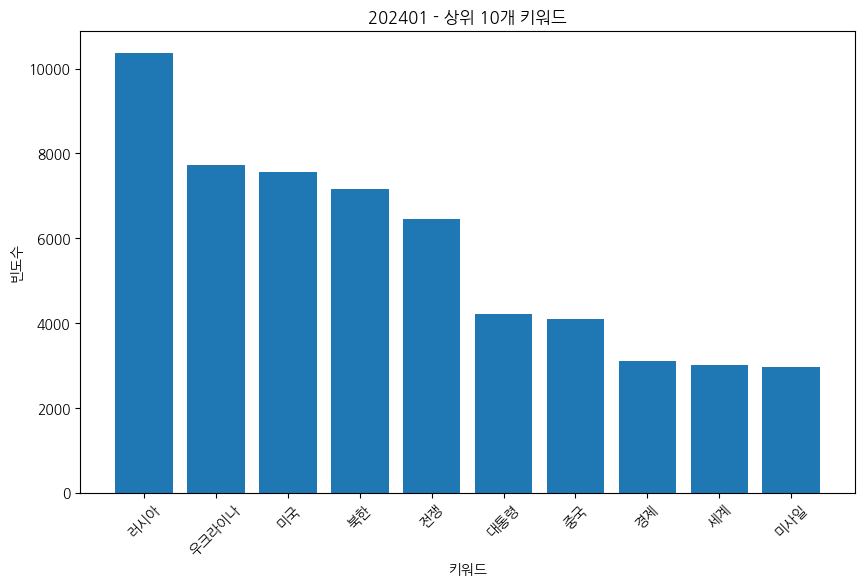

202402 - 기사 개수: 2792
202402 - 상위 10개 키워드:
  러시아: 17055회
  우크라이나: 12774회
  미국: 8252회
  대통령: 7924회
  전쟁: 7743회
  북한: 4444회
  푸틴: 4435회
  지원: 4046회
  나토: 2915회
  제재: 2830회


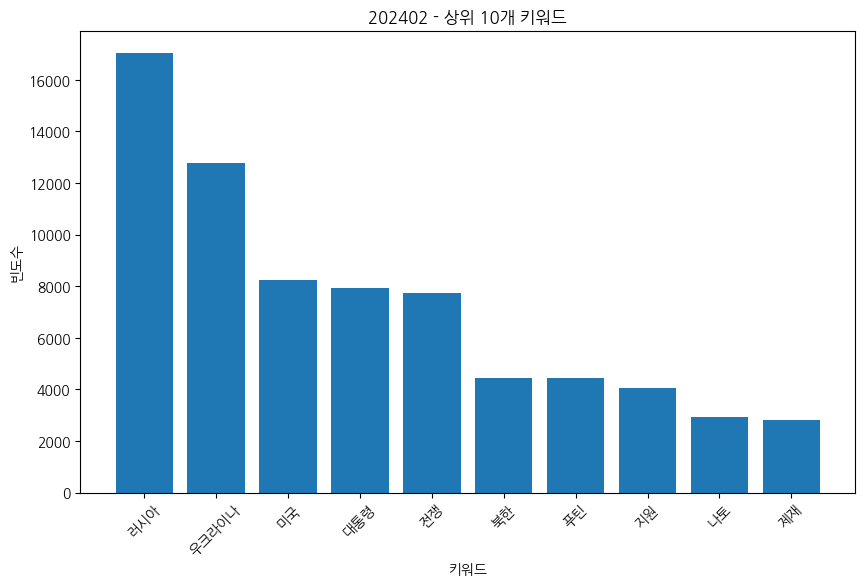

202403 - 기사 개수: 2258
202403 - 상위 10개 키워드:
  러시아: 14432회
  우크라이나: 8719회
  대통령: 6287회
  미국: 5379회
  전쟁: 5245회
  푸틴: 5244회
  북한: 3944회
  중국: 2729회
  국가: 2396회
  한국: 2199회


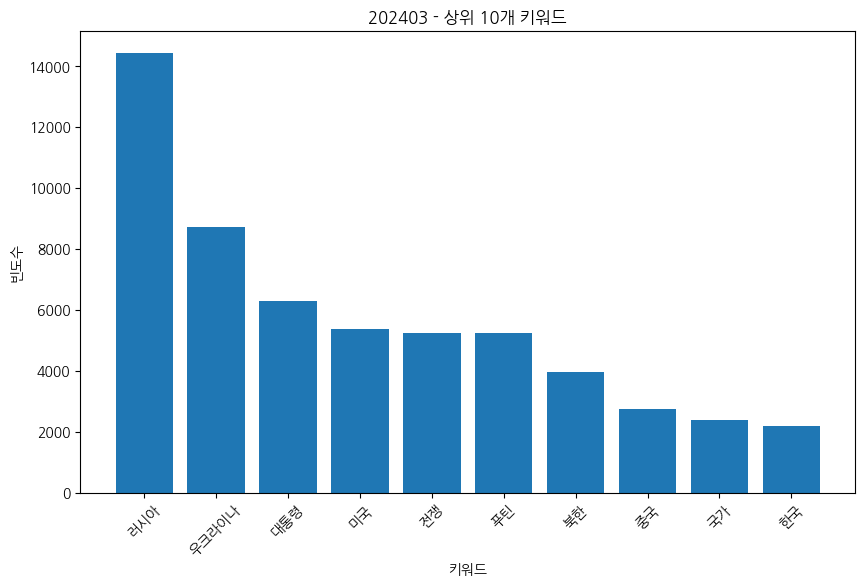

202404 - 기사 개수: 1814
202404 - 상위 10개 키워드:
  러시아: 6757회
  미국: 6711회
  우크라이나: 6193회
  중국: 4288회
  전쟁: 4282회
  이스라엘: 3404회
  대통령: 2795회
  지원: 2789회
  북한: 2442회
  이란: 2332회


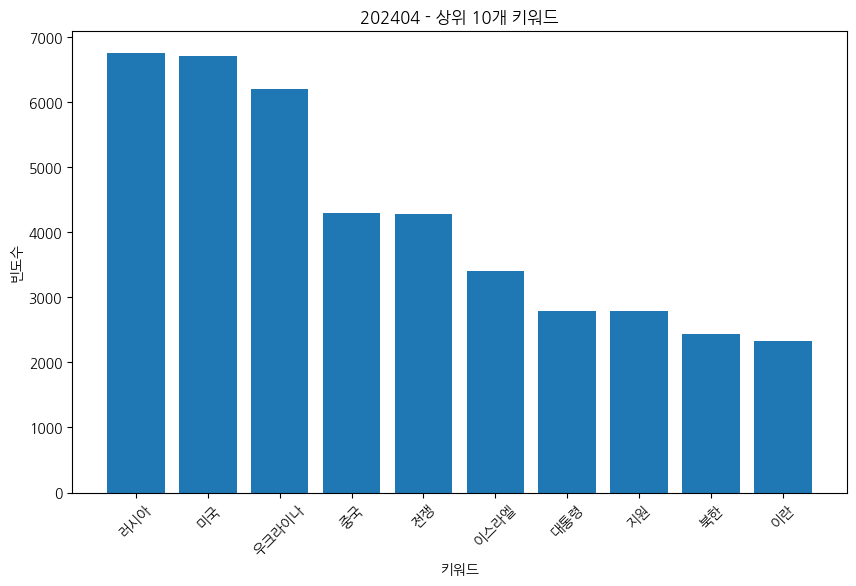

202405 - 기사 개수: 2159
202405 - 상위 10개 키워드:
  러시아: 11144회
  우크라이나: 7562회
  중국: 6155회
  미국: 6121회
  대통령: 5983회
  전쟁: 4786회
  푸틴: 3313회
  북한: 3281회
  무기: 2550회
  정부: 2179회


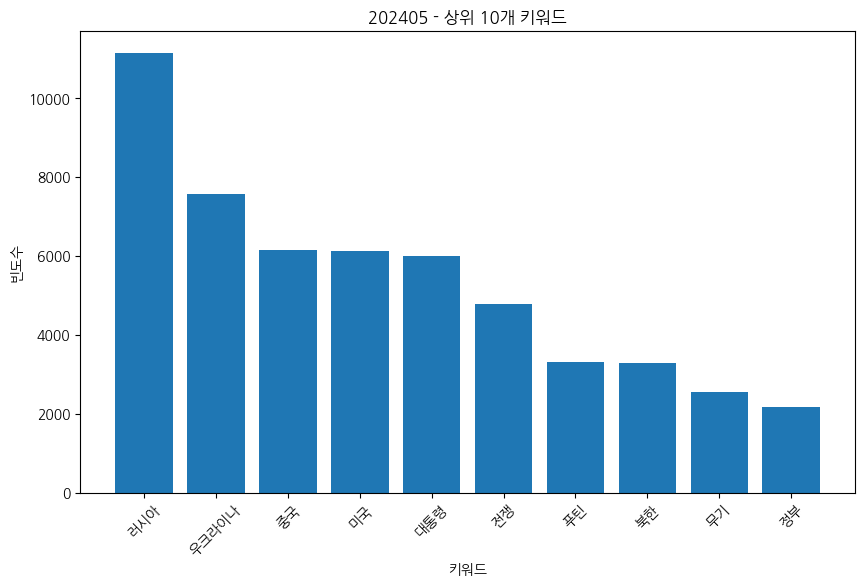

202406 - 기사 개수: 3082
202406 - 상위 10개 키워드:
  러시아: 20262회
  북한: 12851회
  우크라이나: 11586회
  대통령: 10344회
  미국: 7973회
  푸틴: 7717회
  전쟁: 7426회
  중국: 6016회
  지원: 5230회
  무기: 4669회


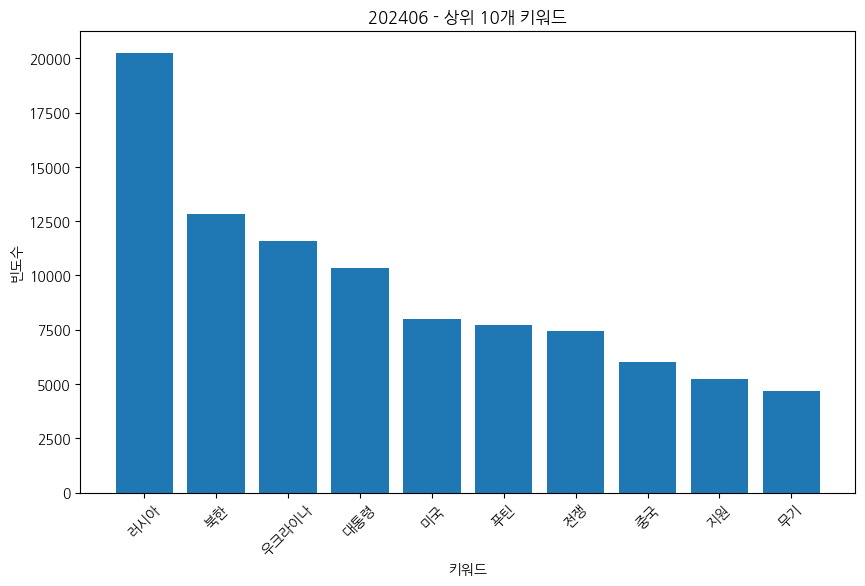

202407 - 기사 개수: 2235
202407 - 상위 10개 키워드:
  러시아: 9585회
  대통령: 8566회
  우크라이나: 8113회
  미국: 7270회
  중국: 4971회
  전쟁: 4970회
  트럼프: 4395회
  나토: 4080회
  북한: 3948회
  지원: 3191회


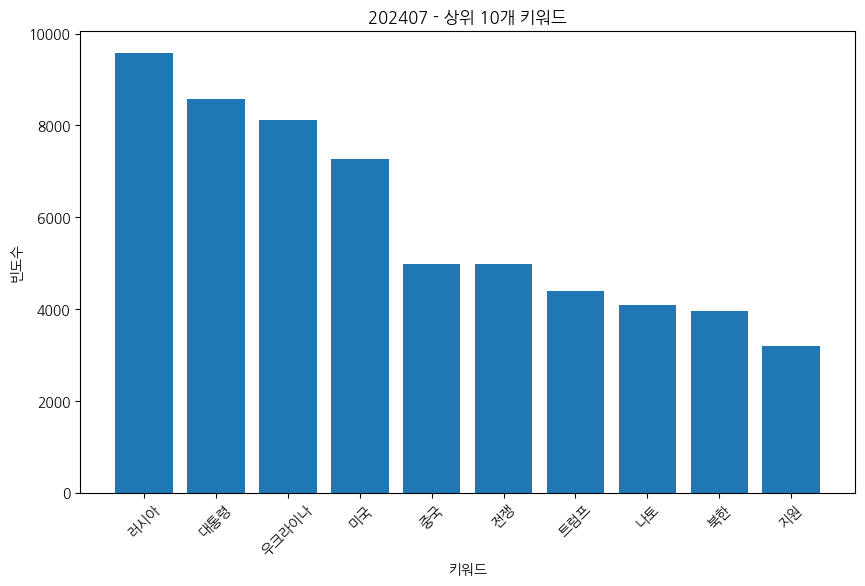

202408 - 기사 개수: 1926
202408 - 상위 10개 키워드:
  러시아: 12094회
  우크라이나: 9407회
  미국: 4710회
  전쟁: 4527회
  대통령: 4303회
  공격: 3577회
  북한: 2352회
  지역: 2288회
  중국: 2279회
  우크라이나군: 2018회


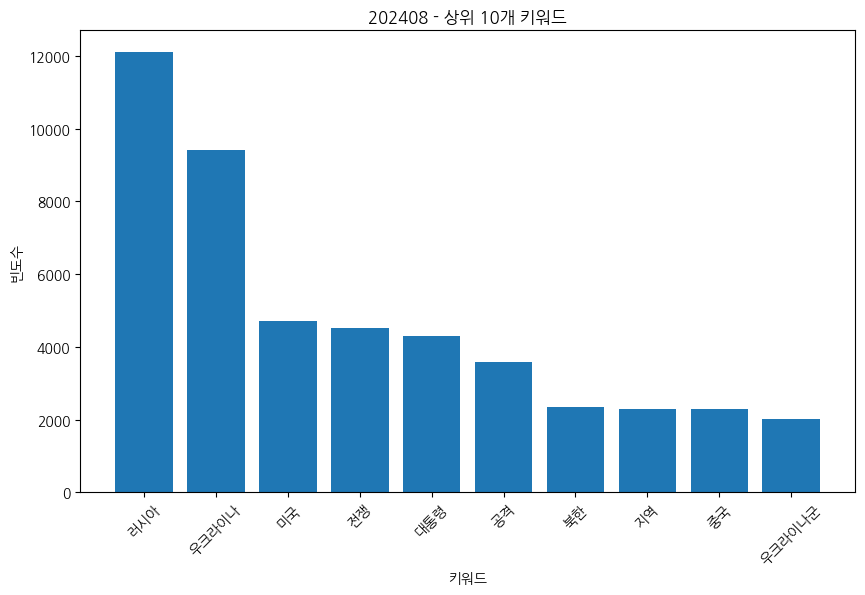

202409 - 기사 개수: 1931
202409 - 상위 10개 키워드:
  러시아: 9522회
  우크라이나: 8316회
  대통령: 5855회
  미국: 5806회
  전쟁: 4863회
  북한: 3392회
  중국: 2708회
  트럼프: 2601회
  미사일: 2104회
  정부: 2090회


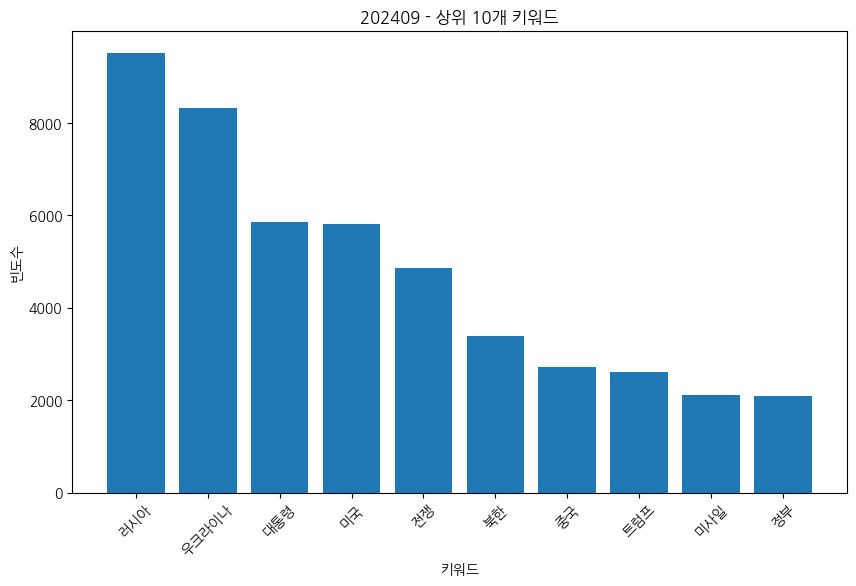

202410 - 기사 개수: 5377
202410 - 상위 10개 키워드:
  러시아: 31387회
  북한: 26880회
  우크라이나: 21120회
  파병: 15869회
  북한군: 14749회
  전쟁: 13351회
  대통령: 11143회
  미국: 10049회
  지원: 7766회
  정부: 7005회


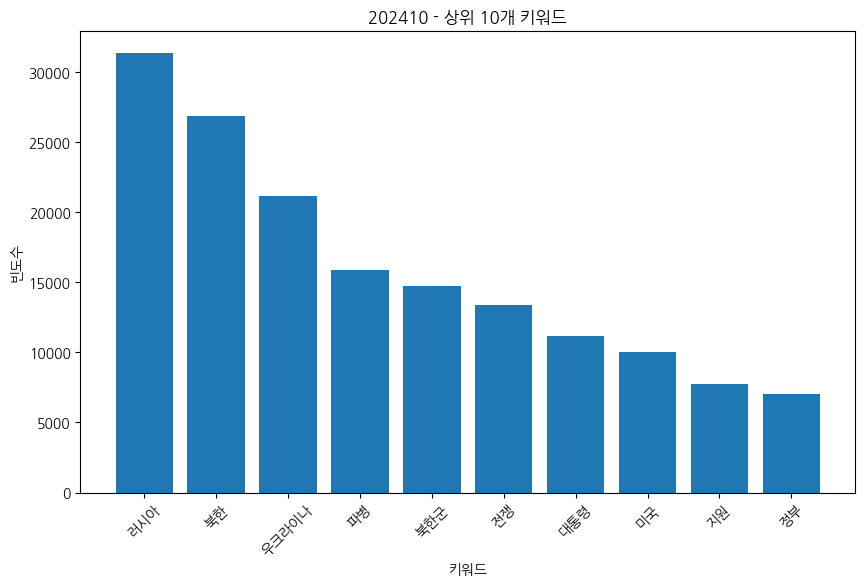

202411 - 기사 개수: 5903
202411 - 상위 10개 키워드:
  러시아: 30799회
  우크라이나: 28292회
  트럼프: 21984회
  미국: 21219회
  대통령: 18867회
  전쟁: 15895회
  북한: 14983회
  북한군: 9601회
  지원: 8362회
  정부: 7692회


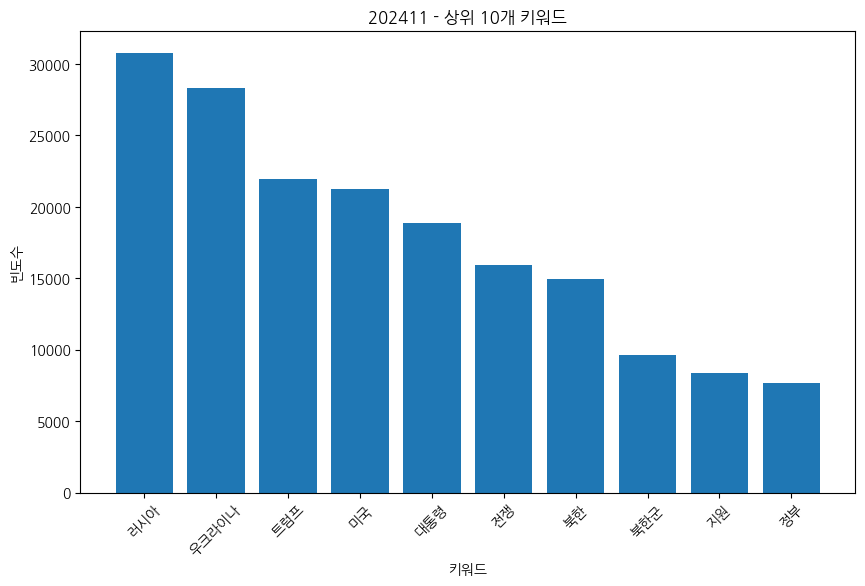

202412 - 기사 개수: 1930
202412 - 상위 10개 키워드:
  러시아: 8893회
  우크라이나: 8248회
  대통령: 5681회
  트럼프: 5677회
  미국: 5240회
  전쟁: 4628회
  북한군: 3716회
  북한: 3291회
  한국: 2759회
  당선인: 2430회


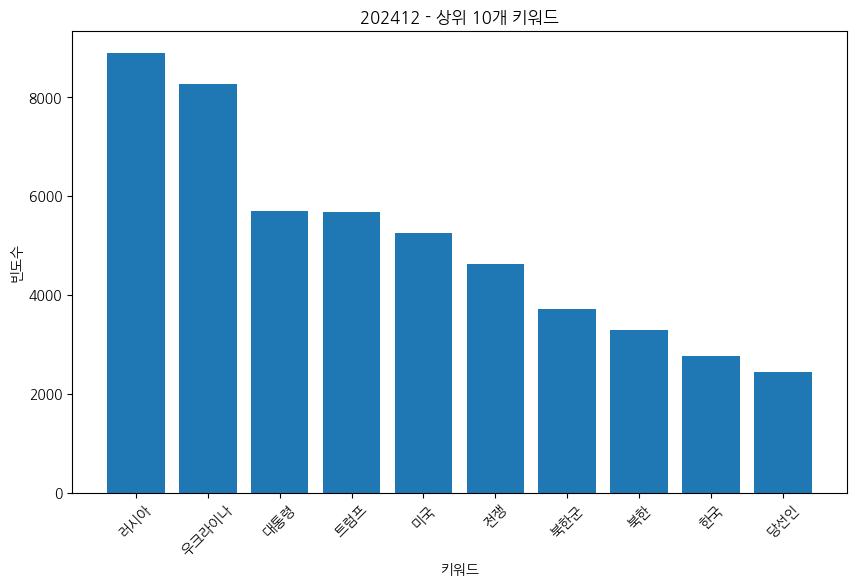

cluste - 기사 개수: 2937
cluste - 상위 10개 키워드:
  우크라이나: 22421회
  러시아: 22252회
  대통령: 8082회
  전쟁: 6596회
  후보: 6468회
  침공: 6226회
  미국: 5681회
  푸틴: 4677회
  제재: 4271회
  이날: 2954회


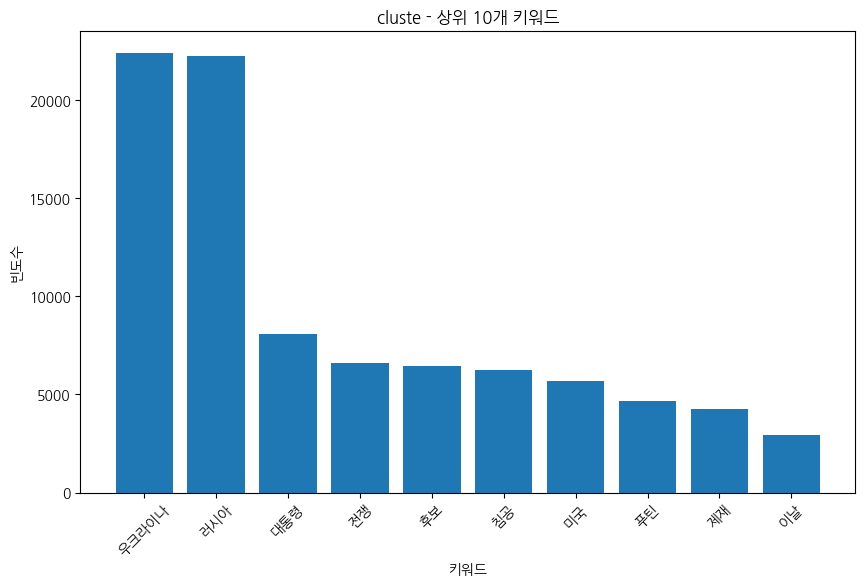

cluste - 기사 개수: 13439
cluste - 상위 10개 키워드:
  러시아: 87758회
  우크라이나: 79114회
  전쟁: 31556회
  대통령: 25768회
  미국: 25756회
  침공: 18686회
  푸틴: 15443회
  중국: 14775회
  러시아군: 13094회
  세계: 12113회


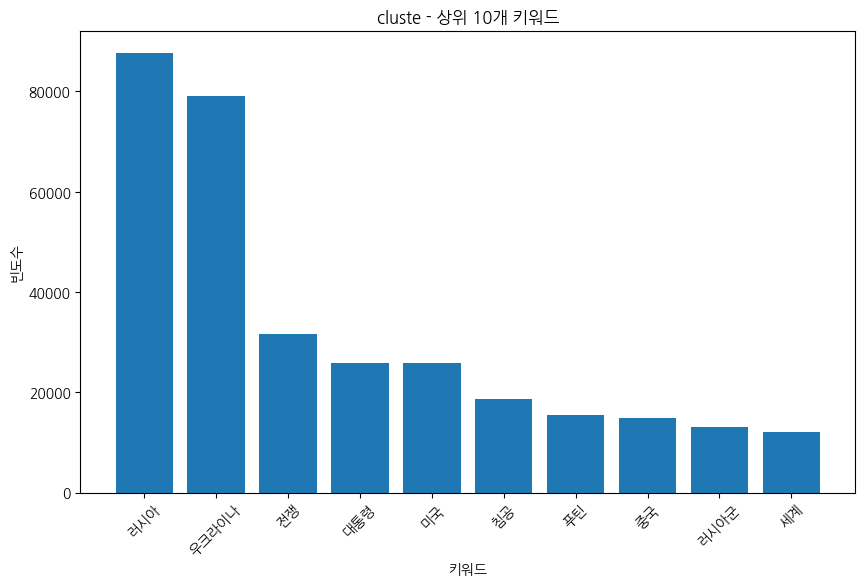

cluste - 기사 개수: 8659
cluste - 상위 10개 키워드:
  러시아: 45013회
  우크라이나: 41931회
  전쟁: 20906회
  미국: 16321회
  대통령: 15289회
  가격: 10768회
  러시아군: 9550회
  상승: 8541회
  푸틴: 7965회
  경제: 7916회


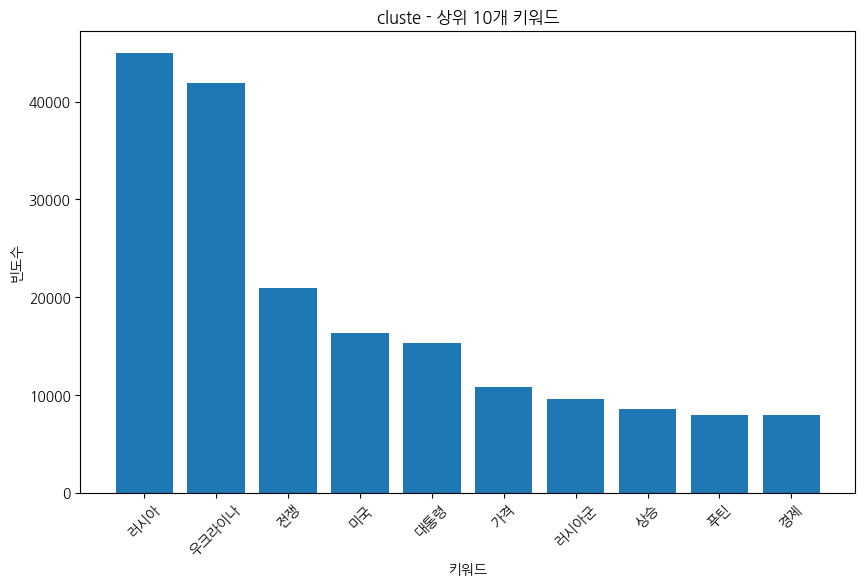

cluste - 기사 개수: 6580
cluste - 상위 10개 키워드:
  러시아: 30624회
  우크라이나: 28359회
  전쟁: 15193회
  미국: 13153회
  대통령: 11231회
  가격: 9519회
  중국: 7539회
  세계: 7496회
  푸틴: 6263회
  정부: 6175회


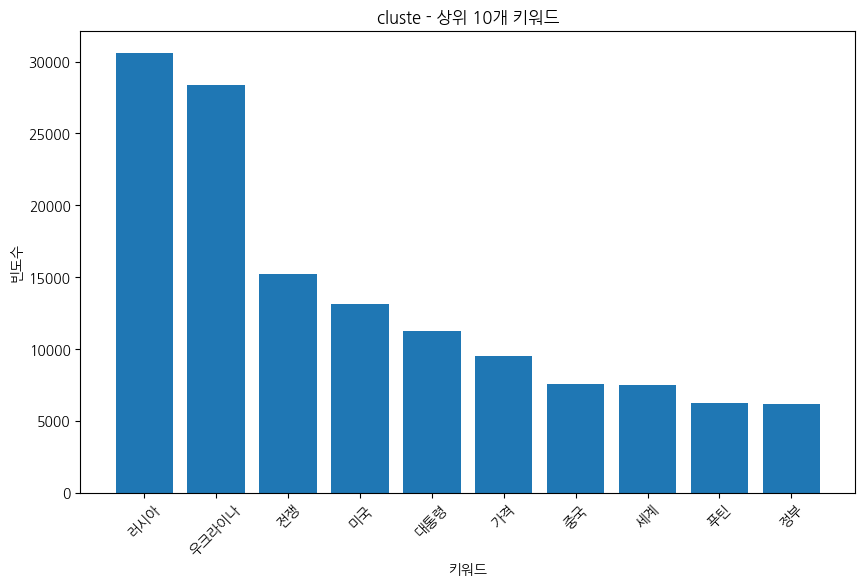

cluste - 기사 개수: 5767
cluste - 상위 10개 키워드:
  러시아: 24742회
  우크라이나: 23538회
  전쟁: 13208회
  미국: 10810회
  대통령: 9437회
  가격: 8766회
  중국: 7011회
  상승: 6058회
  경제: 6003회
  세계: 5975회


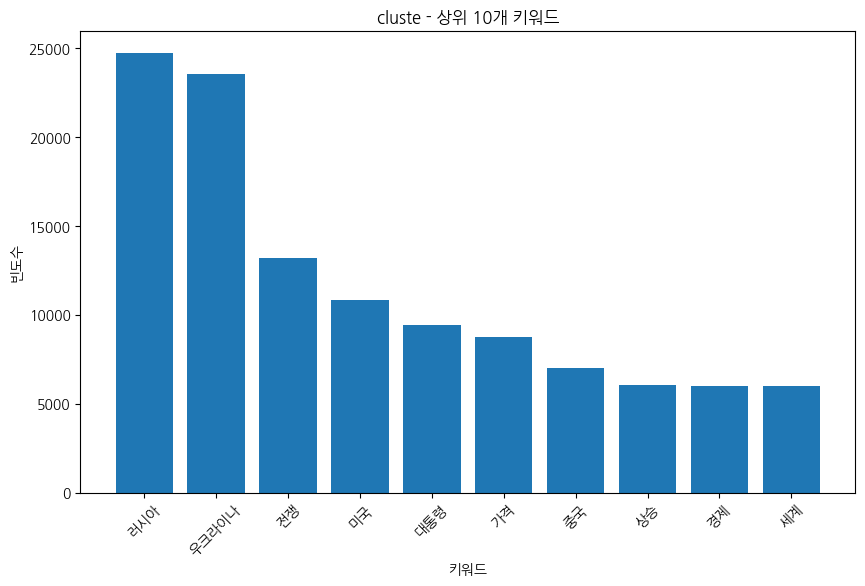

cluste - 기사 개수: 4852
cluste - 상위 10개 키워드:
  러시아: 17256회
  우크라이나: 15709회
  전쟁: 9649회
  미국: 9102회
  가격: 7363회
  중국: 6468회
  경제: 6165회
  대통령: 5706회
  상승: 5228회
  달러: 5047회


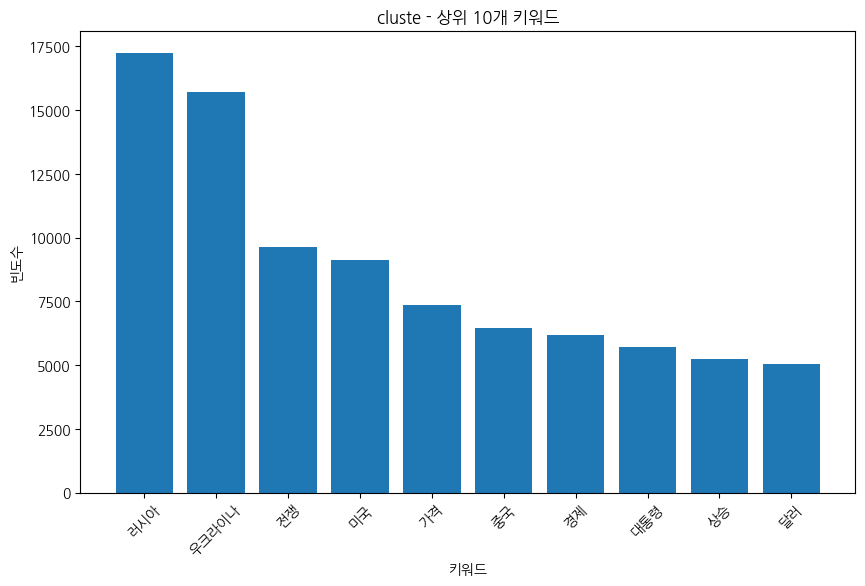

cluste - 기사 개수: 3887
cluste - 상위 10개 키워드:
  러시아: 16254회
  우크라이나: 14070회
  미국: 8390회
  전쟁: 7840회
  중국: 6417회
  가격: 6140회
  대통령: 4504회
  달러: 4272회
  세계: 4018회
  정부: 3929회


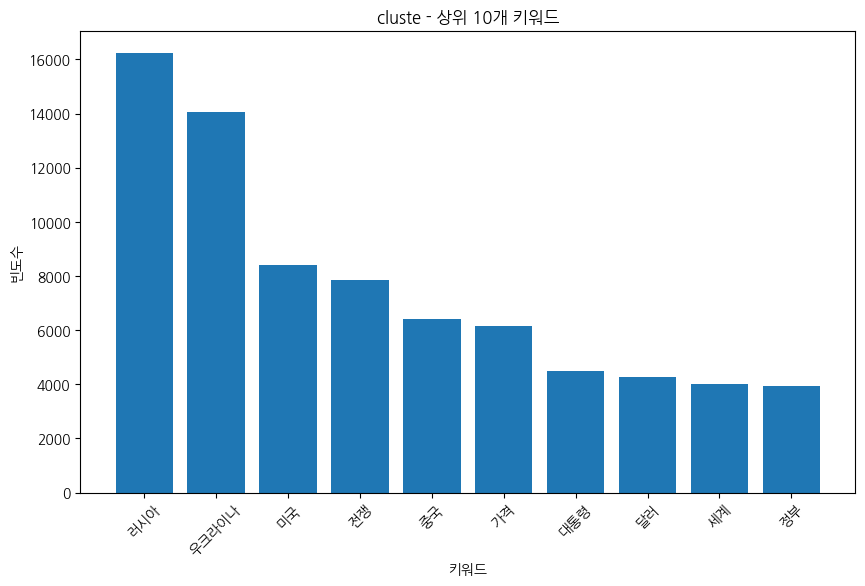

cluste - 기사 개수: 4501
cluste - 상위 10개 키워드:
  러시아: 26328회
  우크라이나: 15847회
  전쟁: 10162회
  대통령: 9369회
  미국: 9306회
  푸틴: 6727회
  중국: 6048회
  에너지: 5094회
  가격: 5049회
  정부: 4621회


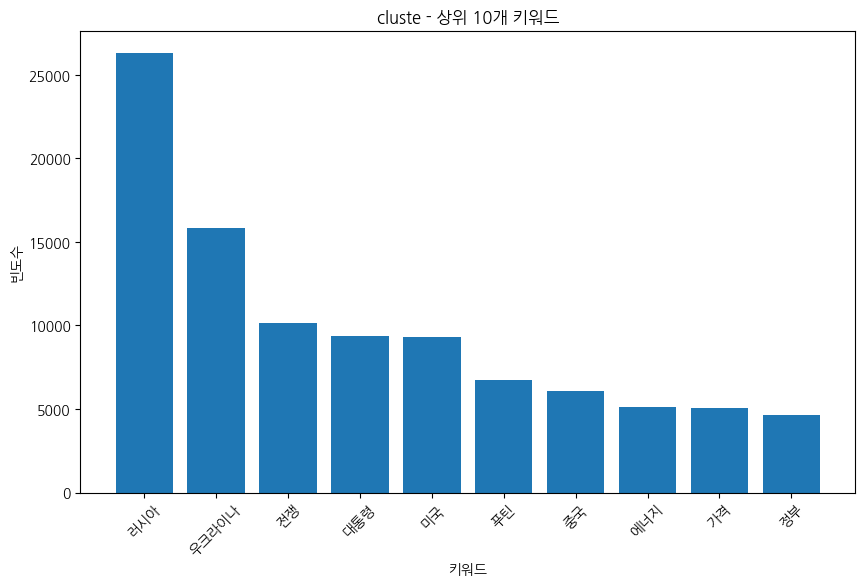

cluste - 기사 개수: 4940
cluste - 상위 10개 키워드:
  러시아: 24912회
  우크라이나: 18867회
  미국: 11464회
  전쟁: 9469회
  대통령: 8850회
  푸틴: 5933회
  중국: 5392회
  경제: 5089회
  상황: 5076회
  정부: 4908회


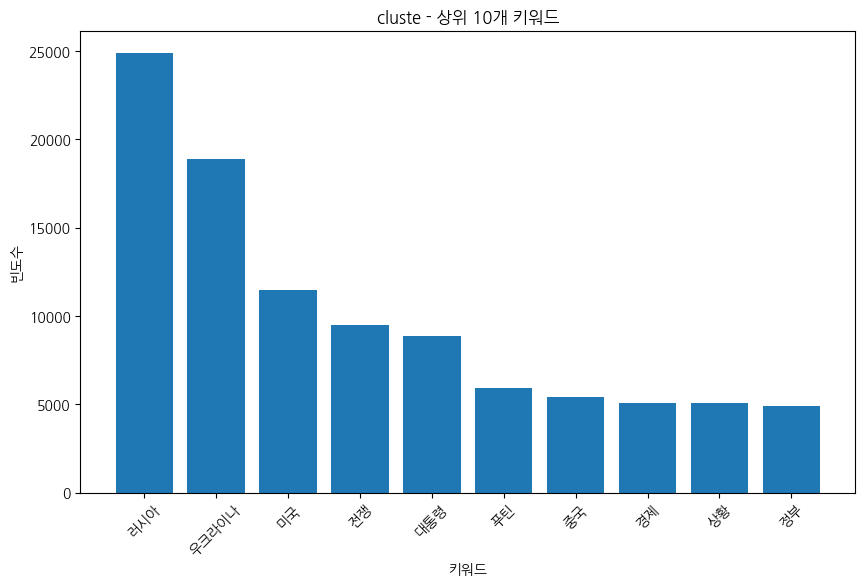

cluste - 기사 개수: 3909
cluste - 상위 10개 키워드:
  러시아: 17571회
  우크라이나: 14620회
  미국: 9438회
  전쟁: 8016회
  대통령: 6563회
  중국: 5740회
  경제: 4734회
  북한: 4134회
  미사일: 4133회
  가격: 3941회


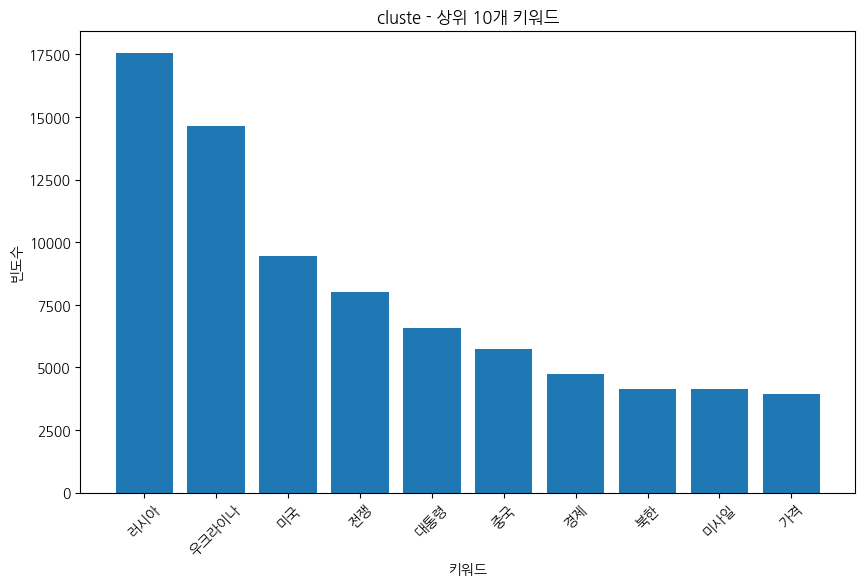

cluste - 기사 개수: 4297
cluste - 상위 10개 키워드:
  러시아: 19081회
  우크라이나: 15860회
  대통령: 10291회
  전쟁: 9709회
  미국: 9517회
  푸틴: 5348회
  내년: 5200회
  중국: 5179회
  가격: 5078회
  지원: 4537회


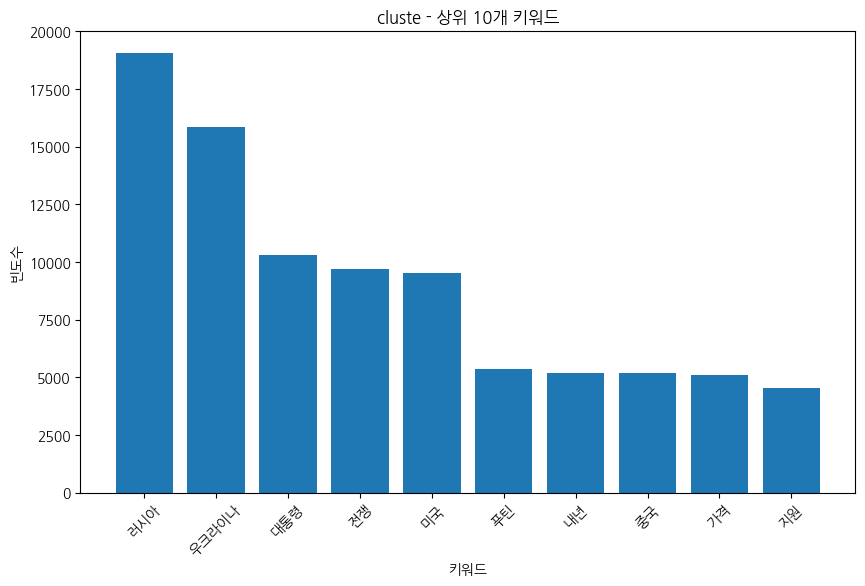

cluste - 기사 개수: 4549
cluste - 상위 10개 키워드:
  러시아: 16461회
  우크라이나: 15963회
  전쟁: 9506회
  미국: 9188회
  지원: 6887회
  중국: 5888회
  대통령: 5871회
  경제: 5528회
  정부: 5526회
  가격: 5376회


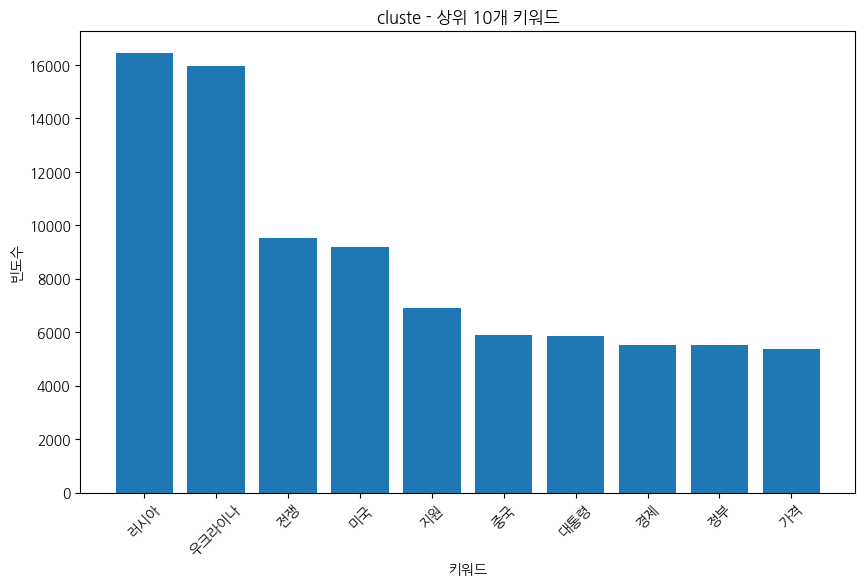

cluste - 기사 개수: 4784
cluste - 상위 10개 키워드:
  러시아: 25898회
  우크라이나: 24273회
  전쟁: 15068회
  미국: 11469회
  대통령: 11064회
  중국: 10265회
  지원: 9550회
  푸틴: 4686회
  정부: 4610회
  가격: 4525회


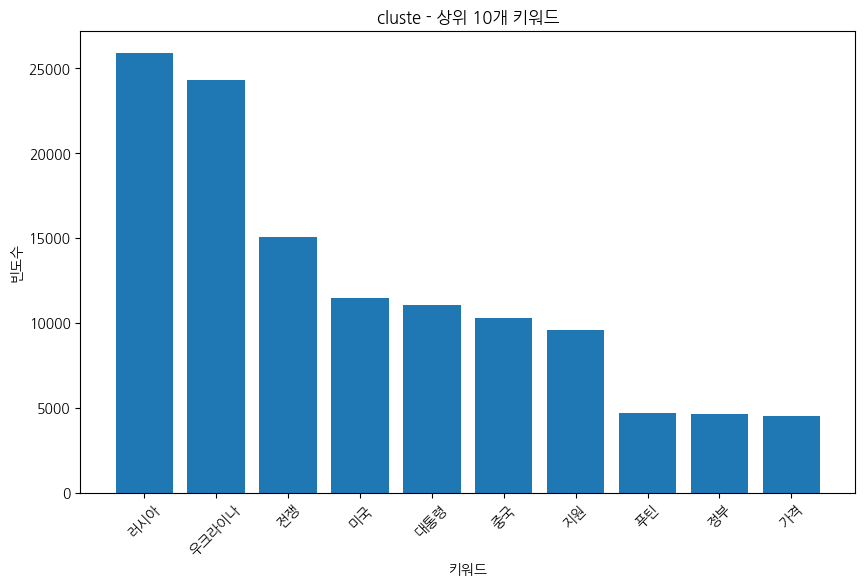

cluste - 기사 개수: 3571
cluste - 상위 10개 키워드:
  러시아: 18840회
  우크라이나: 14649회
  중국: 10008회
  미국: 8871회
  전쟁: 8396회
  대통령: 7077회
  푸틴: 4701회
  지원: 4001회
  정부: 3565회
  한국: 3080회


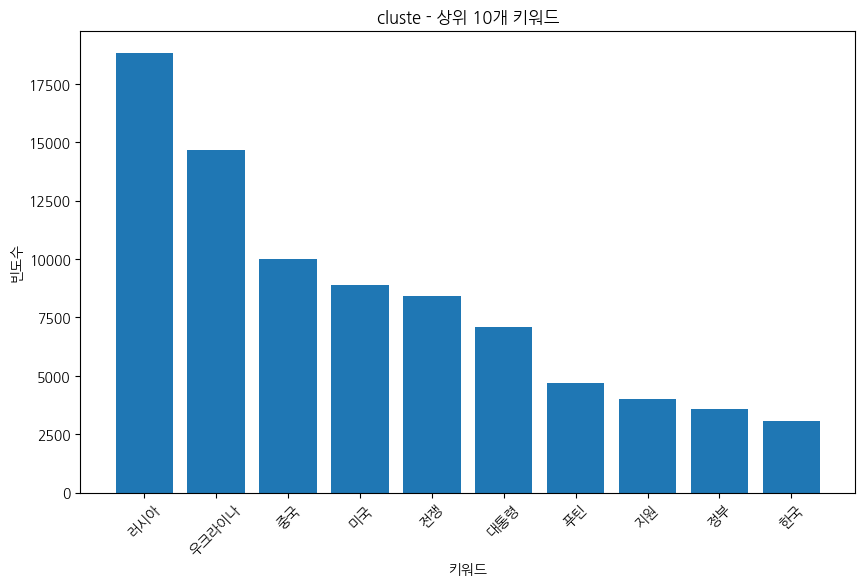

cluste - 기사 개수: 3977
cluste - 상위 10개 키워드:
  러시아: 16708회
  미국: 14719회
  우크라이나: 14526회
  대통령: 14188회
  중국: 10461회
  전쟁: 8245회
  지원: 8080회
  한국: 7522회
  정부: 5625회
  무기: 5072회


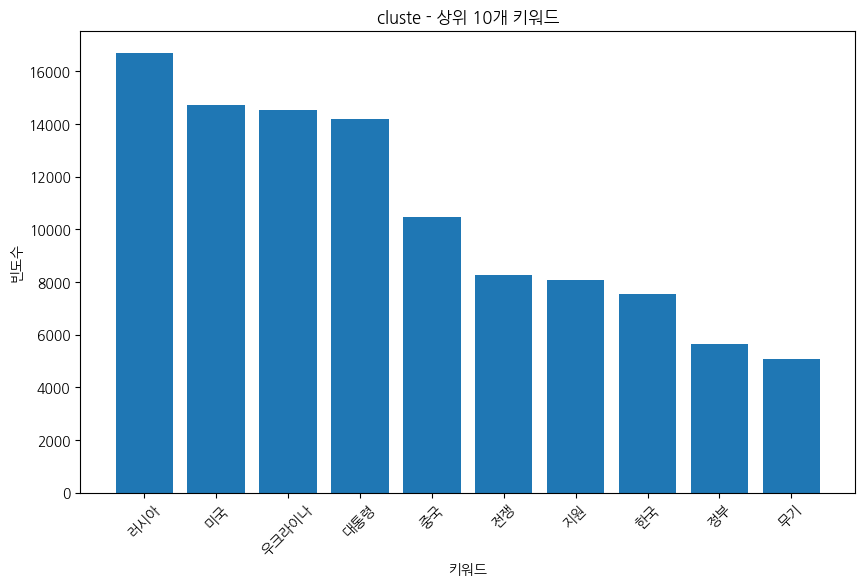

cluste - 기사 개수: 3403
cluste - 상위 10개 키워드:
  러시아: 16871회
  우크라이나: 15567회
  대통령: 9955회
  미국: 7682회
  중국: 7549회
  전쟁: 7155회
  지원: 4739회
  한국: 4052회
  정부: 3992회
  정상: 3248회


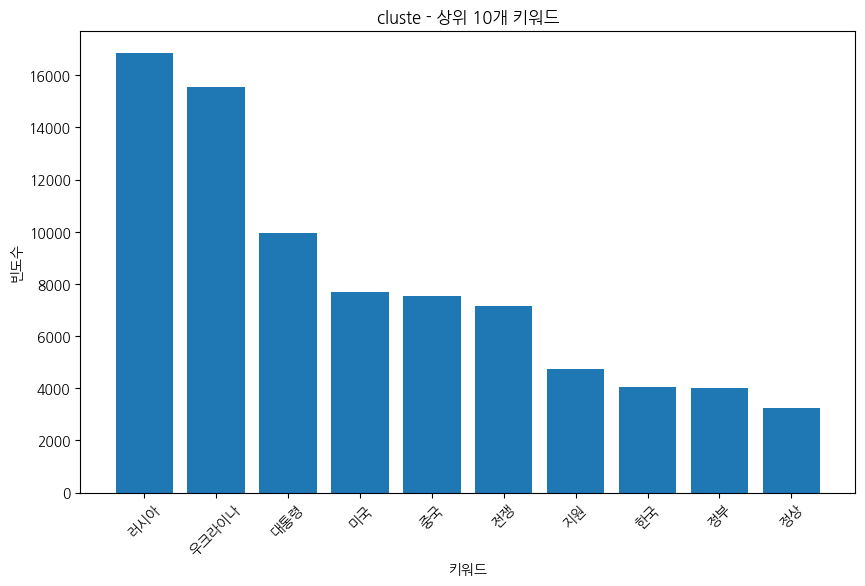

cluste - 기사 개수: 3342
cluste - 상위 10개 키워드:
  러시아: 18876회
  우크라이나: 13761회
  대통령: 8242회
  미국: 7213회
  전쟁: 7014회
  푸틴: 6038회
  중국: 5330회
  프리고진: 4084회
  가격: 4056회
  정부: 4032회


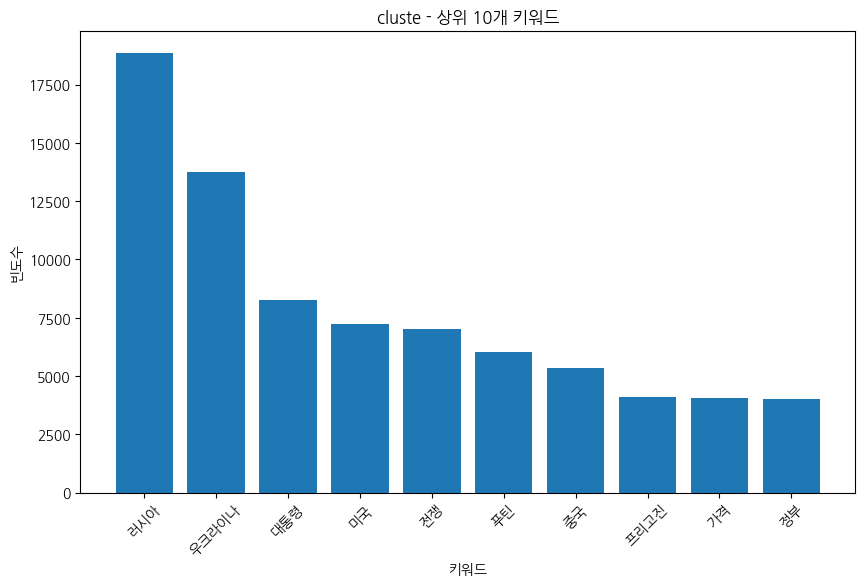

cluste - 기사 개수: 3609
cluste - 상위 10개 키워드:
  우크라이나: 19264회
  러시아: 18435회
  대통령: 12491회
  전쟁: 7931회
  미국: 7189회
  중국: 5860회
  지원: 5499회
  나토: 5437회
  북한: 4421회
  한국: 3923회


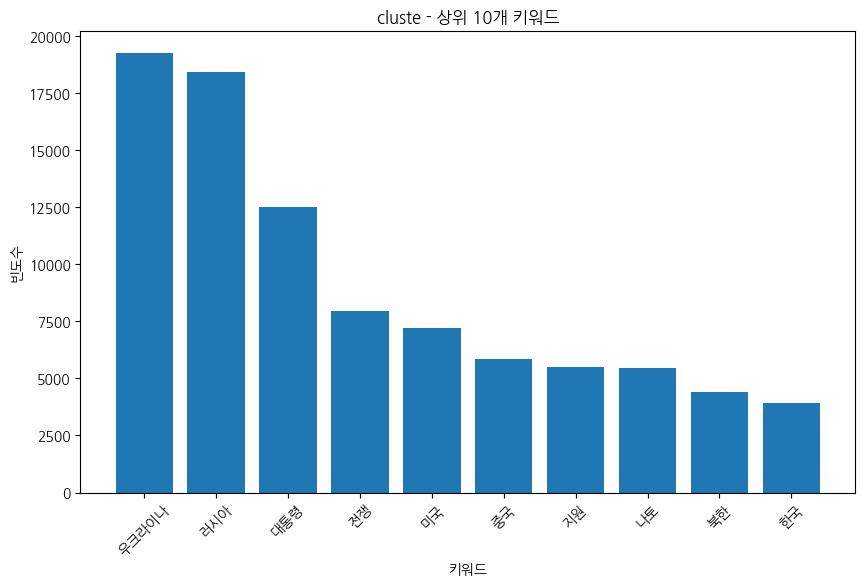

cluste - 기사 개수: 2496
cluste - 상위 10개 키워드:
  러시아: 12970회
  우크라이나: 9586회
  미국: 5853회
  전쟁: 5236회
  중국: 4498회
  대통령: 4284회
  북한: 3548회
  공격: 2706회
  정부: 2680회
  경제: 2407회


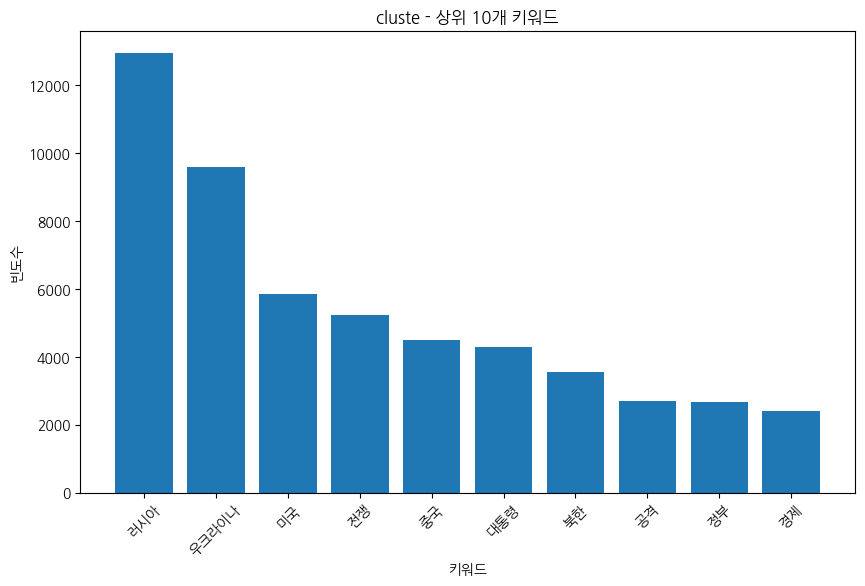

cluste - 기사 개수: 3864
cluste - 상위 10개 키워드:
  러시아: 26330회
  북한: 16015회
  우크라이나: 13594회
  대통령: 11899회
  미국: 10122회
  전쟁: 8557회
  중국: 8022회
  무기: 6840회
  푸틴: 6223회
  지원: 5821회


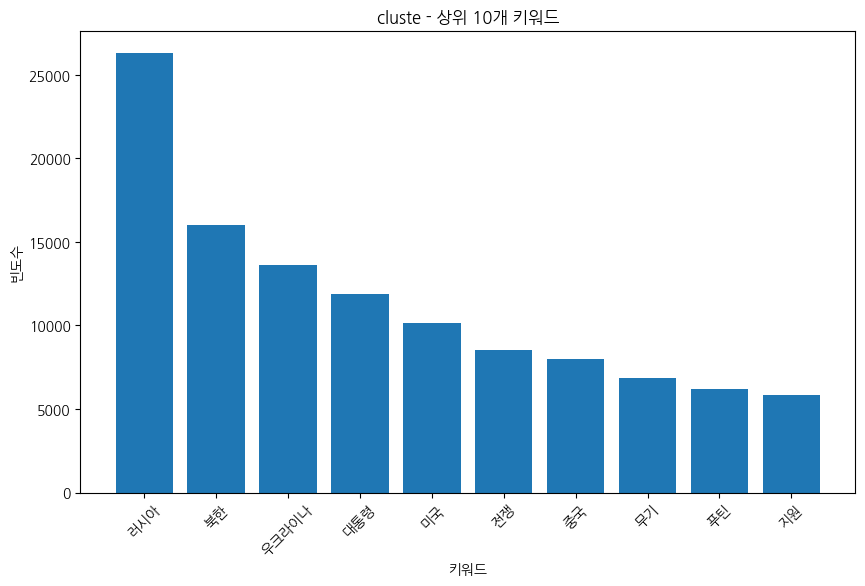

cluste - 기사 개수: 2765
cluste - 상위 10개 키워드:
  러시아: 9854회
  전쟁: 8793회
  이스라엘: 8788회
  미국: 8611회
  우크라이나: 7754회
  하마스: 5019회
  대통령: 4966회
  중국: 4906회
  지원: 4073회
  정부: 3995회


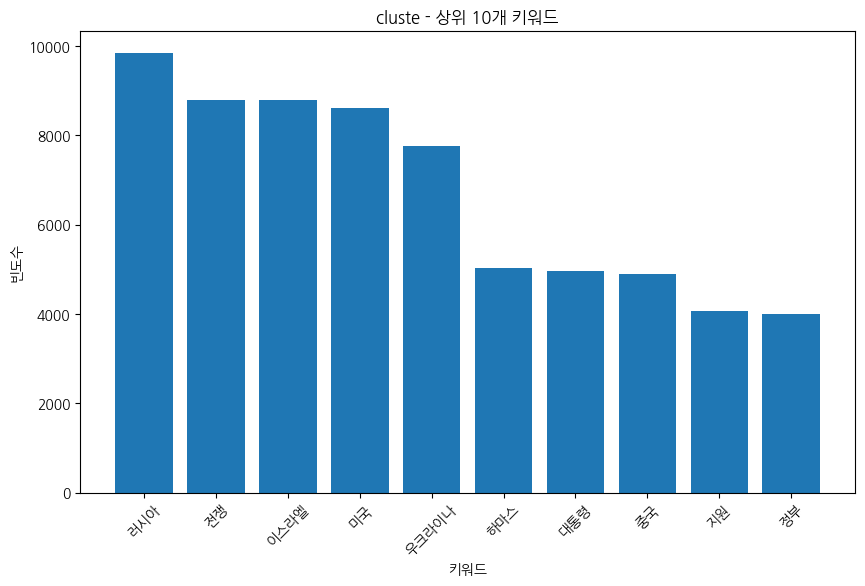

cluste - 기사 개수: 2468
cluste - 상위 10개 키워드:
  러시아: 8371회
  미국: 7230회
  전쟁: 6904회
  우크라이나: 6435회
  중국: 5252회
  북한: 5155회
  대통령: 4814회
  이스라엘: 3654회
  경제: 2861회
  정부: 2801회


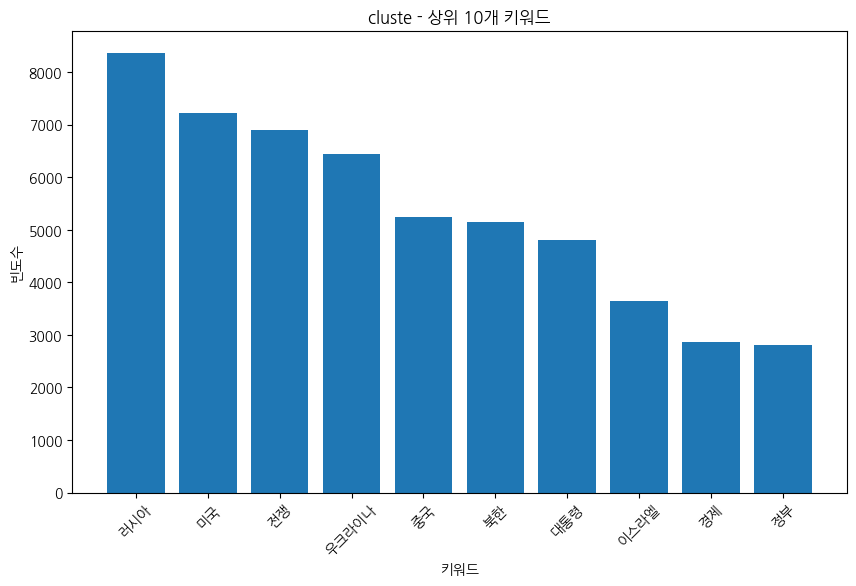

cluste - 기사 개수: 2407
cluste - 상위 10개 키워드:
  러시아: 10817회
  우크라이나: 9973회
  미국: 7022회
  전쟁: 6358회
  대통령: 4977회
  지원: 3961회
  중국: 3211회
  한국: 2769회
  경제: 2749회
  내년: 2610회


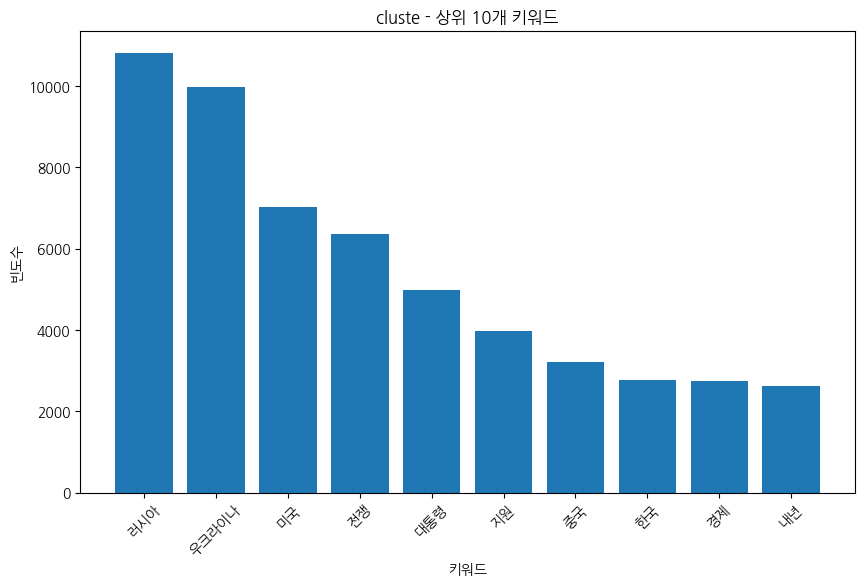

cluste - 기사 개수: 2458
cluste - 상위 10개 키워드:
  러시아: 10376회
  우크라이나: 7717회
  미국: 7553회
  북한: 7147회
  전쟁: 6458회
  대통령: 4220회
  중국: 4101회
  경제: 3100회
  세계: 3014회
  미사일: 2956회


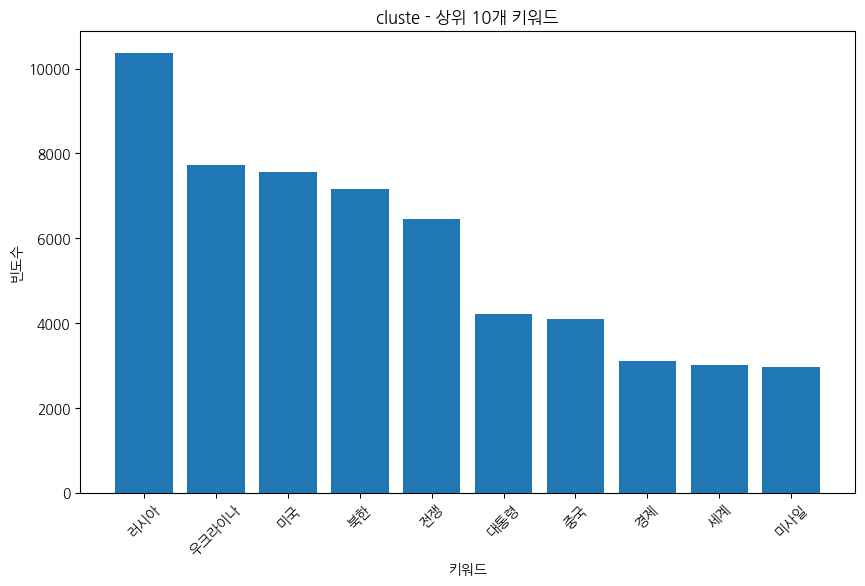

cluste - 기사 개수: 2792
cluste - 상위 10개 키워드:
  러시아: 17055회
  우크라이나: 12774회
  미국: 8252회
  대통령: 7924회
  전쟁: 7743회
  북한: 4444회
  푸틴: 4435회
  지원: 4046회
  나토: 2915회
  제재: 2830회


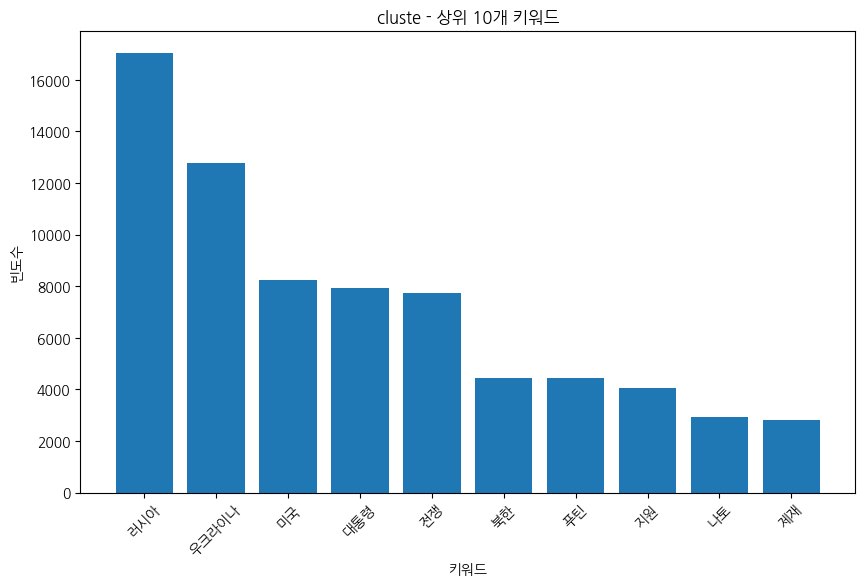

cluste - 기사 개수: 2258
cluste - 상위 10개 키워드:
  러시아: 14432회
  우크라이나: 8719회
  대통령: 6287회
  미국: 5379회
  전쟁: 5245회
  푸틴: 5244회
  북한: 3944회
  중국: 2729회
  국가: 2396회
  한국: 2199회


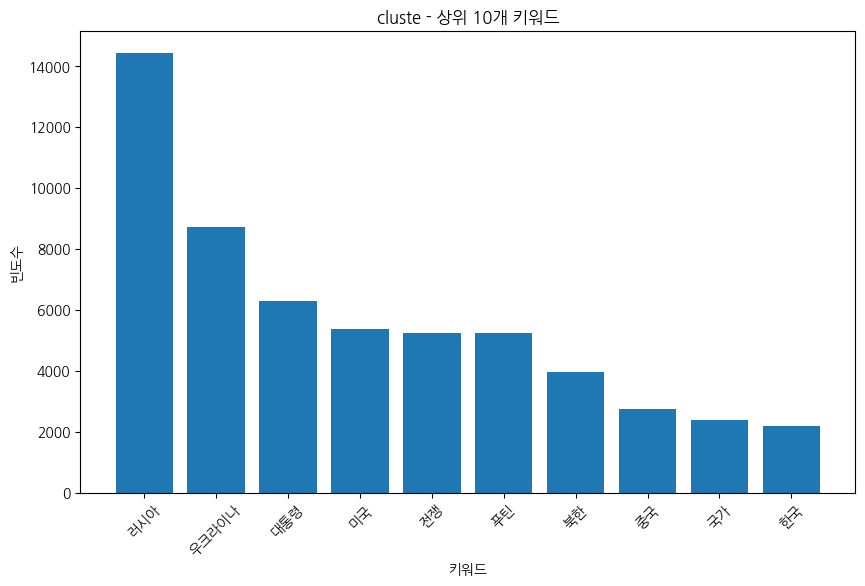

cluste - 기사 개수: 1814
cluste - 상위 10개 키워드:
  러시아: 6757회
  미국: 6711회
  우크라이나: 6193회
  중국: 4288회
  전쟁: 4282회
  이스라엘: 3404회
  대통령: 2795회
  지원: 2789회
  북한: 2442회
  이란: 2332회


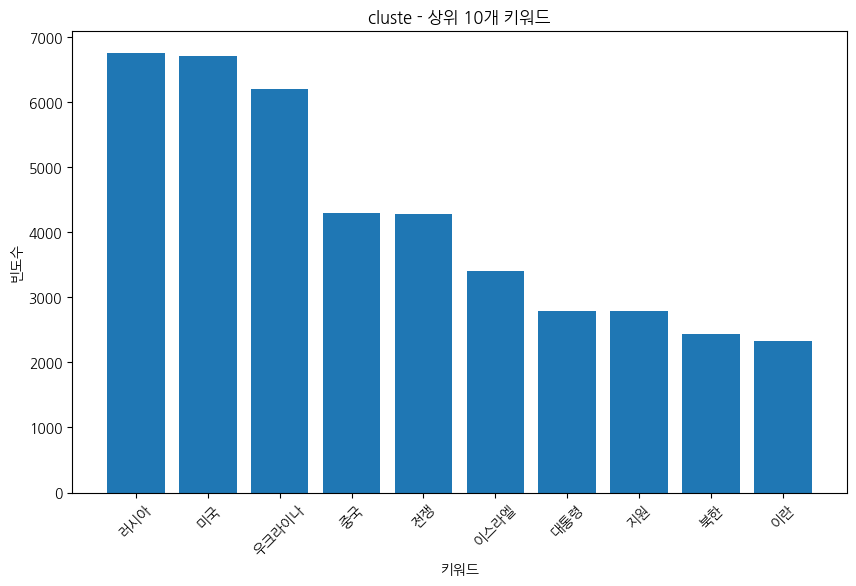

cluste - 기사 개수: 2159
cluste - 상위 10개 키워드:
  러시아: 11144회
  우크라이나: 7562회
  중국: 6155회
  미국: 6121회
  대통령: 5983회
  전쟁: 4786회
  푸틴: 3313회
  북한: 3281회
  무기: 2550회
  정부: 2179회


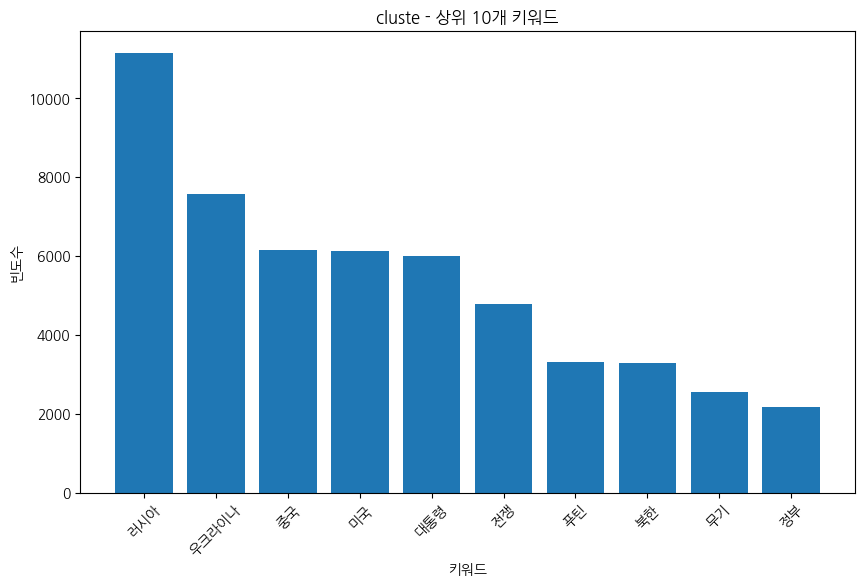

cluste - 기사 개수: 3082
cluste - 상위 10개 키워드:
  러시아: 20262회
  북한: 12851회
  우크라이나: 11586회
  대통령: 10344회
  미국: 7973회
  푸틴: 7717회
  전쟁: 7426회
  중국: 6016회
  지원: 5230회
  무기: 4669회


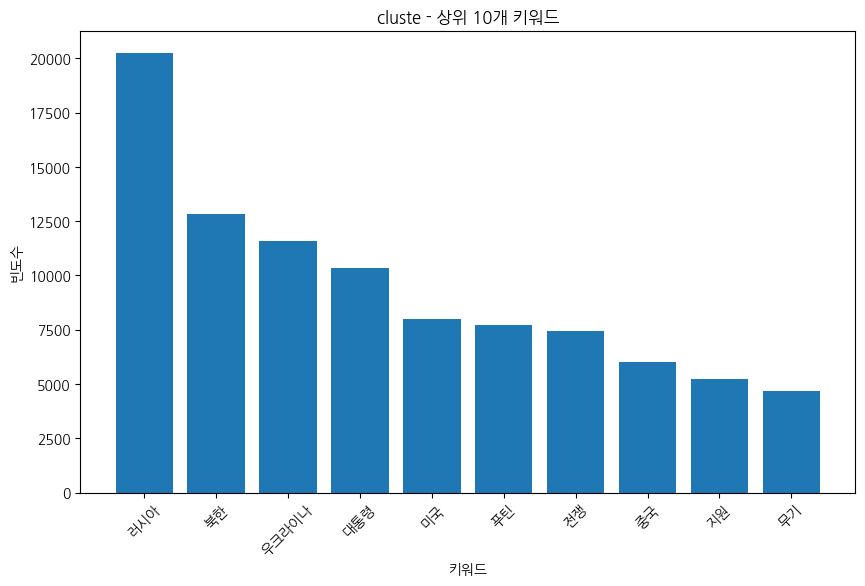

cluste - 기사 개수: 2235
cluste - 상위 10개 키워드:
  러시아: 9585회
  대통령: 8566회
  우크라이나: 8113회
  미국: 7270회
  중국: 4971회
  전쟁: 4970회
  트럼프: 4395회
  나토: 4080회
  북한: 3948회
  지원: 3191회


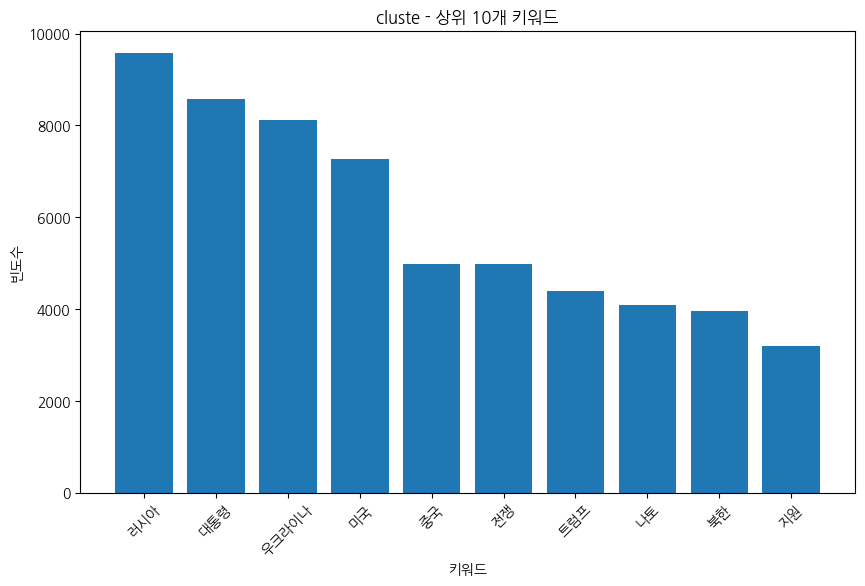

cluste - 기사 개수: 1926
cluste - 상위 10개 키워드:
  러시아: 12094회
  우크라이나: 9407회
  미국: 4710회
  전쟁: 4527회
  대통령: 4303회
  공격: 3577회
  북한: 2352회
  지역: 2288회
  중국: 2279회
  우크라이나군: 2018회


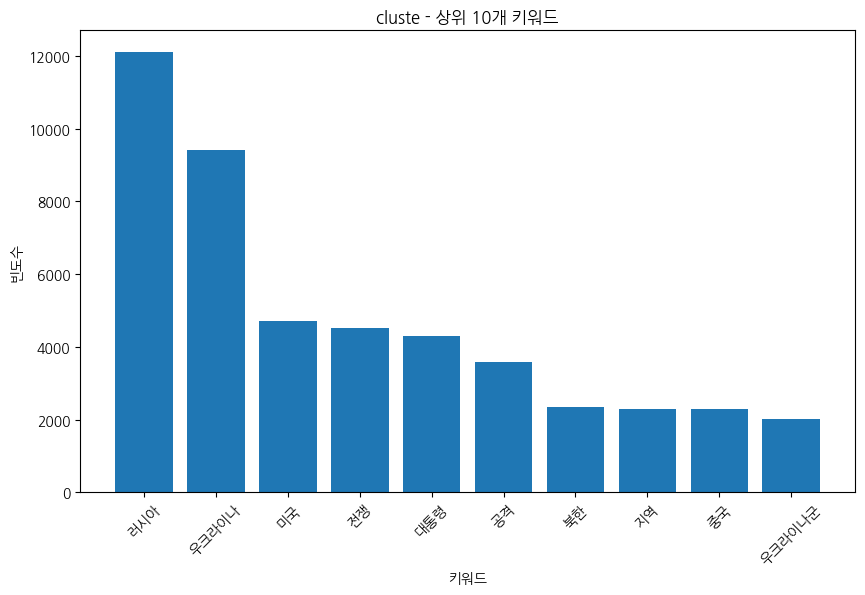

cluste - 기사 개수: 1931
cluste - 상위 10개 키워드:
  러시아: 9522회
  우크라이나: 8316회
  대통령: 5855회
  미국: 5806회
  전쟁: 4863회
  북한: 3392회
  중국: 2708회
  트럼프: 2601회
  미사일: 2104회
  정부: 2090회


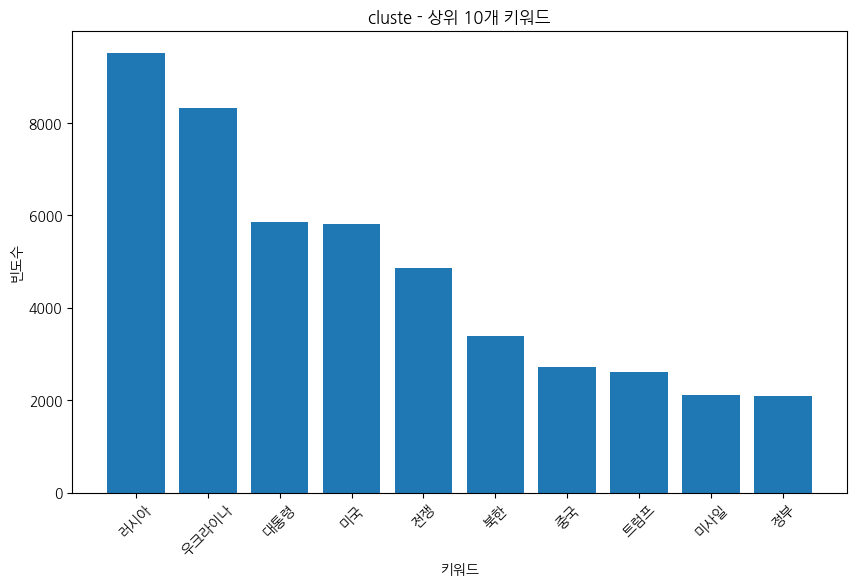

cluste - 기사 개수: 5377
cluste - 상위 10개 키워드:
  러시아: 31387회
  북한: 26880회
  우크라이나: 21120회
  파병: 15869회
  북한군: 14749회
  전쟁: 13351회
  대통령: 11143회
  미국: 10049회
  지원: 7766회
  정부: 7005회


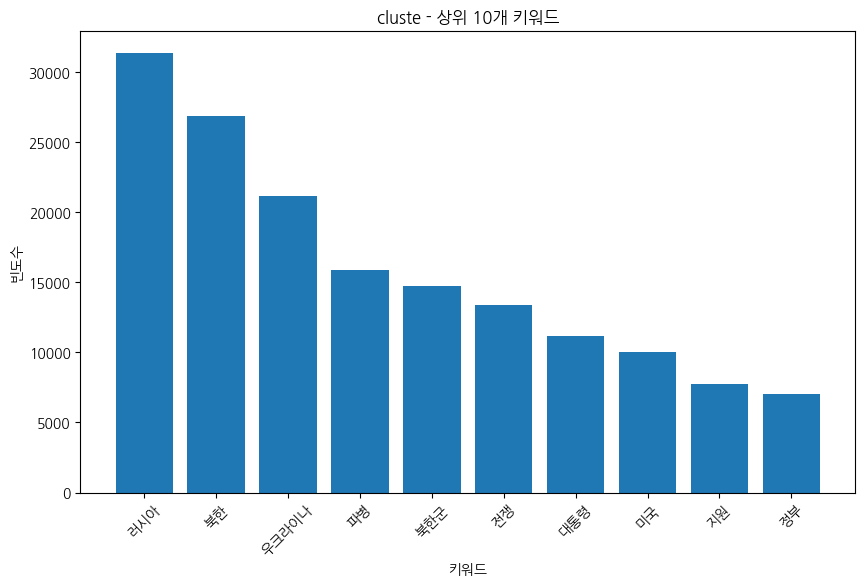

cluste - 기사 개수: 5903
cluste - 상위 10개 키워드:
  러시아: 30799회
  우크라이나: 28292회
  트럼프: 21984회
  미국: 21219회
  대통령: 18867회
  전쟁: 15895회
  북한: 14983회
  북한군: 9601회
  지원: 8362회
  정부: 7692회


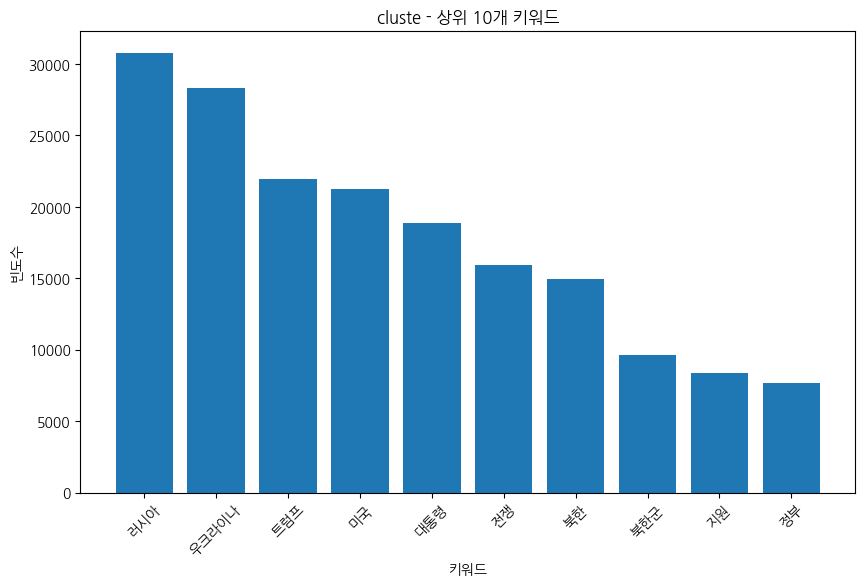

cluste - 기사 개수: 1930
cluste - 상위 10개 키워드:
  러시아: 8893회
  우크라이나: 8248회
  대통령: 5681회
  트럼프: 5677회
  미국: 5240회
  전쟁: 4628회
  북한군: 3716회
  북한: 3291회
  한국: 2759회
  당선인: 2430회


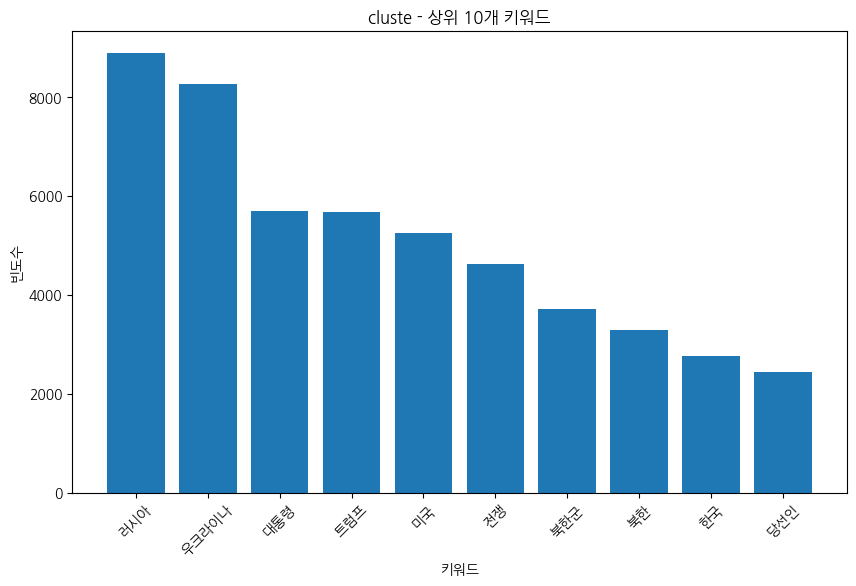

In [4]:
plt.rc('font', family='NanumGothic')
plt.rc('axes', unicode_minus=False)

def perform_monthly_eda(folder_path):
  files = [f for f in os.listdir(folder_path) if f.endswith("_extracted.csv")]
  files.sort()

  for file in files:
    file_path = os.path.join(folder_path, file)
    month = file[:6]
    df = pd.read_csv(file_path)


    article_count = len(df)
    print(f"{month} - 기사 개수: {article_count}")

    if df['키워드'].isna().all():
      print(f"{month} - 키워드 없음")
      continue


    all_keywords = " ".join(df['키워드'].dropna())
    keyword_counter = Counter(all_keywords.split(','))


    top_keywords = keyword_counter.most_common(10)
    print(f"{month} - 상위 10개 키워드:")
    for keyword, count in top_keywords:
      print(f"  {keyword}: {count}회")


    plt.figure(figsize=(10, 6))
    plt.bar([keyword for keyword, _ in top_keywords], [count for _, count in top_keywords])
    plt.title(f"{month} - 상위 10개 키워드")
    plt.xlabel("키워드")
    plt.ylabel("빈도수")
    plt.xticks(rotation=45)
    plt.show()


folder_path = "/content/drive/MyDrive/빅데이터 최종과제/Data/월별_데이터_분할"
perform_monthly_eda(folder_path)

# 4. K-means 분석
### 수행 내용
- 데이터를 전처리하는 과정을 통해 각 데이터의 라벨을 만듭니다.
- 월별 데이터 K-means분석을 통해 기사를 기사 주제를 중심으로 군집화합니다.
- 군집은 빅카인즈의 기사 카테고리의 개수를 고려해서 9개로 정했습니다.
<br><br>
### 데이터 전처리
- 통합 분류1의 최상위 분류를 분류 기준으로 사용하며, 이를 위해 최상위 분류를 추출해서 One-Hot Encoding을 사용했습니다.
- 군집분석의 정확도를 위해 키워드의 빈도를 벡터화하는 TF-IDF를 사용했습니다.

In [9]:
def preprocess_data(file_path):
  df = pd.read_csv(file_path)
  df['키워드'] = df['키워드'].fillna('')
  df[['통합 분류1', '통합 분류2', '통합 분류3']] = df[['통합 분류1', '통합 분류2', '통합 분류3']].fillna('')

  # 통합 분류 1분류 추출
  df['통합분류1_대분류'] = df['통합 분류1'].str.split('>').str[0]
  return df


def vectorize_data(df):
  df_categories = pd.get_dummies(df['통합분류1_대분류'], prefix="category")
  df = pd.concat([df, df_categories], axis=1)

  vectorizer = TfidfVectorizer(max_features=1000)
  tfidf_matrix = vectorizer.fit_transform(df['키워드'])

  combined_matrix = hstack([df_categories.values, tfidf_matrix])

  return combined_matrix, vectorizer, df_categories.columns.tolist(), df


def perform_kmeans(combined_matrix, n_clusters=9):
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  kmeans.fit(combined_matrix)
  return kmeans


def analyze_clusters(kmeans, df, vectorizer, df_categories_columns):
  df['Cluster'] = kmeans.labels_

  print("군집별 기사 수:")
  print(df['Cluster'].value_counts())

  print("\n군집별 주요 키워드:")
  terms = vectorizer.get_feature_names_out()
  for cluster in range(kmeans.n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_center = kmeans.cluster_centers_[cluster]
    feature_indices = np.argsort(cluster_center[-len(terms):])[::-1]
    print(", ".join(terms[feature_indices[:10]]))

  print("\n군집별 주요 통합 분류:")
  for cluster in range(kmeans.n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data[df_categories_columns].sum().sort_values(ascending=False).head(10))

  return df


def process(folder_path):
  files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
  files.sort()

  for file in files:
    file_path = os.path.join(folder_path, file)
    print(f"\n파일: {file} 처리 중...")

    df = preprocess_data(file_path)

    combined_matrix, vectorizer, df_categories_columns, df = vectorize_data(df)

    n_clusters = 5
    kmeans = perform_kmeans(combined_matrix, n_clusters)

    print(f"\n=== {file} 분석 결과 ===")
    df = analyze_clusters(kmeans, df, vectorizer, df_categories_columns)

    output_path = os.path.join(folder_path, f"clustered_{file}")
    df.to_csv(output_path, index=False)
    print(f"클러스터링 결과 저장 완료: {output_path}")


folder_path = "/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)"
output_path = "/content/drive/MyDrive/빅데이터_최종과제/결과"
process(folder_path)


파일: 202202_extracted.csv 처리 중...

=== 202202_extracted.csv 분석 결과 ===
군집별 기사 수:
Cluster
1    1881
4     416
3     328
2     161
0     151
Name: count, dtype: int64

군집별 주요 키워드:

Cluster 0:
북한, 대통령, 발사, 우크라이나, 미사일, 러시아, 도발, 청와대, 국제사회, 동참

Cluster 1:
우크라이나, 러시아, 대통령, 푸틴, 키예프, 침공, 제재, 미국, 전쟁, 공격

Cluster 2:
러시아, 우크라이나, 선수, 경기, 사이버, 축구, 대회, 어나니머스, 전쟁, 스포츠

Cluster 3:
후보, 이재명, 대선, 윤석열, 국민, 발언, 우크라이나, 더불어민주당, 대통령, 평화

Cluster 4:
상승, 가격, 증시, 시장, 러시아, 우크라이나, 하락, 코스피, 물가, 달러

군집별 주요 통합 분류:

Cluster 0:
category_정치       151
category_IT_과학      0
category_경제         0
category_국제         0
category_문화         0
category_미분류        0
category_사회         0
category_스포츠        0
category_지역         0
dtype: int64

Cluster 1:
category_국제       1881
category_IT_과학       0
category_경제          0
category_문화          0
category_미분류         0
category_사회          0
category_스포츠         0
category_정치          0
category_지역          0
dtype: int64

Cluster 2:
category_스포츠      75
category_IT_과학    48
categ

# 5. 시각화
### 수행 내용
- 클러스터를 구분할 수 있도록 이름을 붙였습니다.
- 클러스터의 비중의 변화를 확인할 수 있는 꺾은선 그래프를 만들고, 이를 저장했습니다.

클러스터 비중 변화 표 저장 완료: /content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/cluster_proportions.csv


<Figure size 1000x600 with 0 Axes>

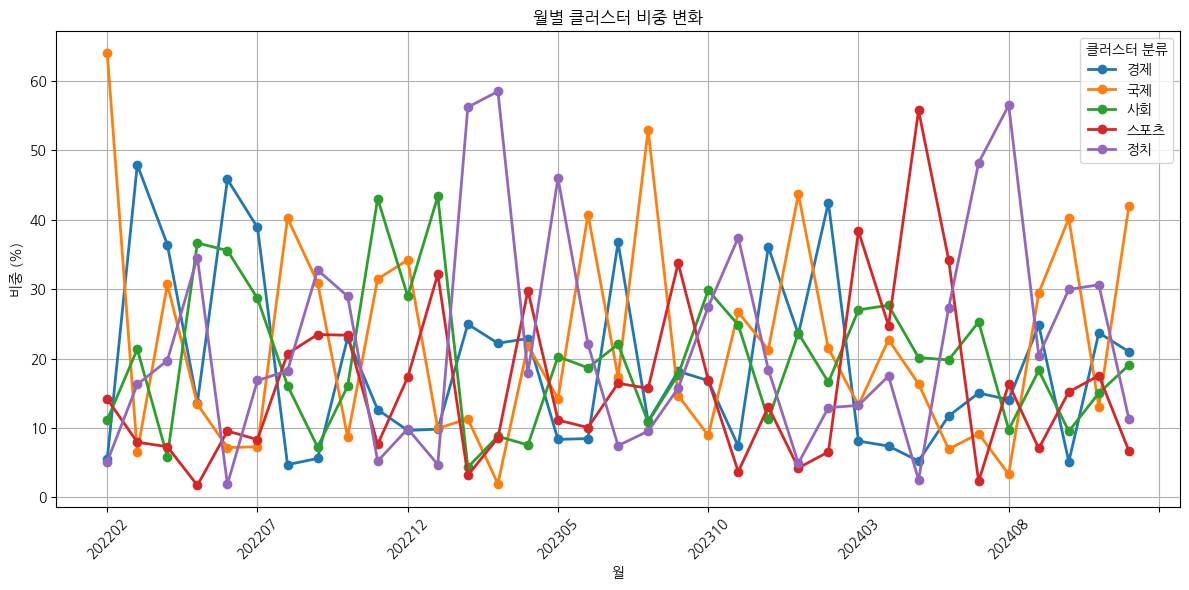

그래프 저장 완료: /content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/cluster_trends.png


In [13]:
CLUSTER_NAMES = {
  0: "정치",
  1: "국제",
  2: "경제",
  3: "사회",
  4: "스포츠",
  5: "IT_과학",
  6: "문화",
  7: "지역",
  8: "기타"
}

def load_data(output_folder):
  files = [f for f in os.listdir(output_folder) if f.startswith('clustered_') and f.endswith('.csv')]
  files.sort()

  data = []
  for file in files:
    file_path = os.path.join(output_folder, file)
    df = pd.read_csv(file_path)
    df['월'] = file.split('_')[1][:6]
    df['Cluster_Name'] = df['Cluster'].map(CLUSTER_NAMES)
    data.append(df)

  return pd.concat(data, ignore_index=True)


def calculate_proportions(df):
  cluster_proportions = (df.groupby(['월', 'Cluster_Name'])
    .size()
    .reset_index(name='기사 수')
    .pivot(index='월', columns='Cluster_Name', values='기사 수')
  )

  cluster_proportions = cluster_proportions.div(cluster_proportions.sum(axis=1), axis=0) * 100
  return cluster_proportions


def save_proportions_table(cluster_proportions, output_folder):
    output_file = os.path.join(output_folder, "cluster_proportions.csv")
    cluster_proportions.to_csv(output_file)
    print(f"클러스터 비중 변화 표 저장 완료: {output_file}")


def make_plot(cluster_proportions, output_folder):
  plt.figure(figsize=(10, 6))
  cluster_proportions.plot(kind='line', marker='o', linewidth=2, figsize=(12, 6))
  plt.title("월별 클러스터 비중 변화")
  plt.xlabel("월")
  plt.ylabel("비중 (%)")
  plt.xticks(rotation=45)
  plt.legend(title="클러스터 분류", loc='upper right')
  plt.grid()
  plt.tight_layout()

  graph_path = os.path.join(output_folder, "cluster_trends.png")
  plt.savefig(graph_path)
  plt.show()
  print(f"그래프 저장 완료: {graph_path}")


output_folder = "/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)"
clustered_data = load_data(output_folder)
cluster_proportions = calculate_proportions(clustered_data)
save_proportions_table(cluster_proportions, output_folder)
make_plot(cluster_proportions, output_folder)

# 5-1. 연도별로 저장한 월별 클러스터 비중 변화

2022년 클러스터 비중 저장 완료: /content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/cluster_proportions_2022.csv
2023년 클러스터 비중 저장 완료: /content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/cluster_proportions_2023.csv
2024년 클러스터 비중 저장 완료: /content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/cluster_proportions_2024.csv


<Figure size 1000x600 with 0 Axes>

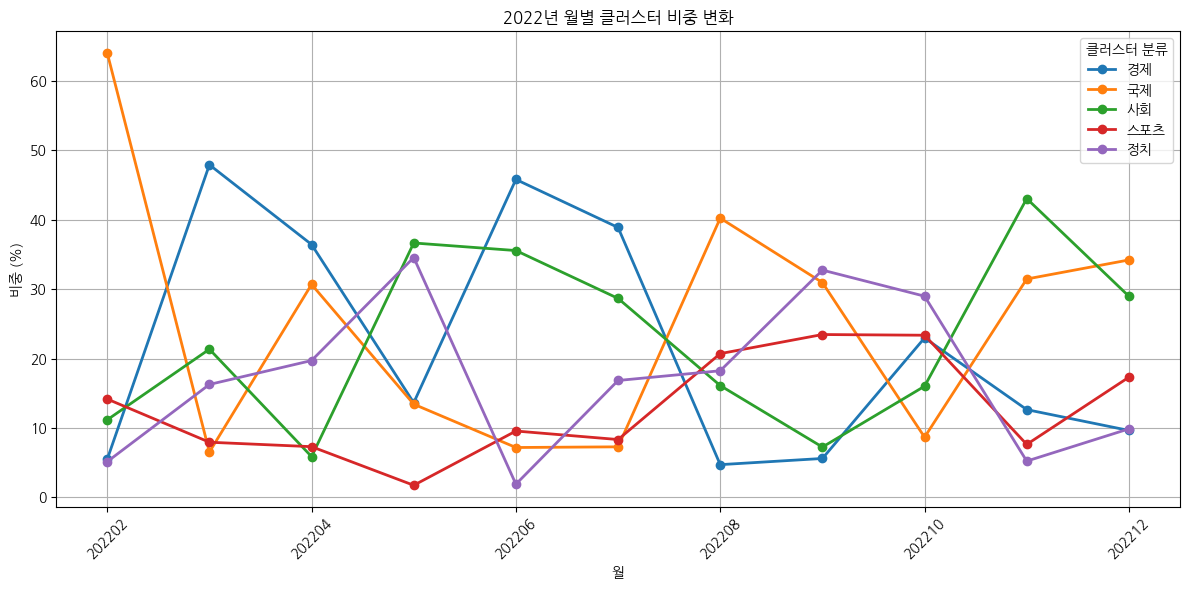

2022년 클러스터 비중 그래프 저장 완료: /content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/cluster_trends_2022.png


<Figure size 1000x600 with 0 Axes>

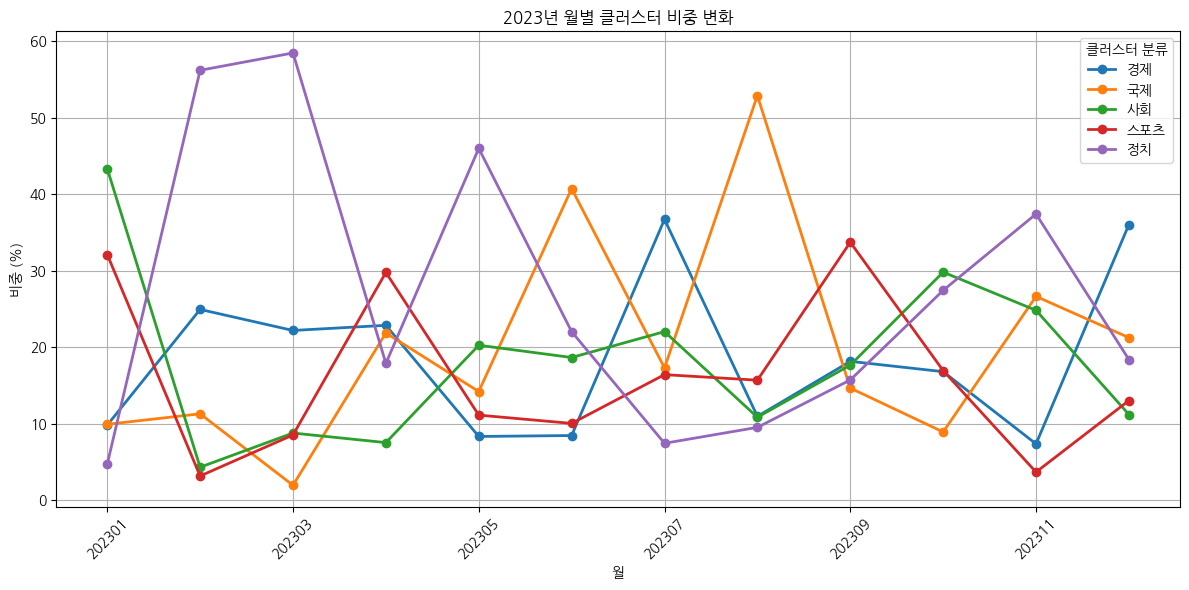

2023년 클러스터 비중 그래프 저장 완료: /content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/cluster_trends_2023.png


<Figure size 1000x600 with 0 Axes>

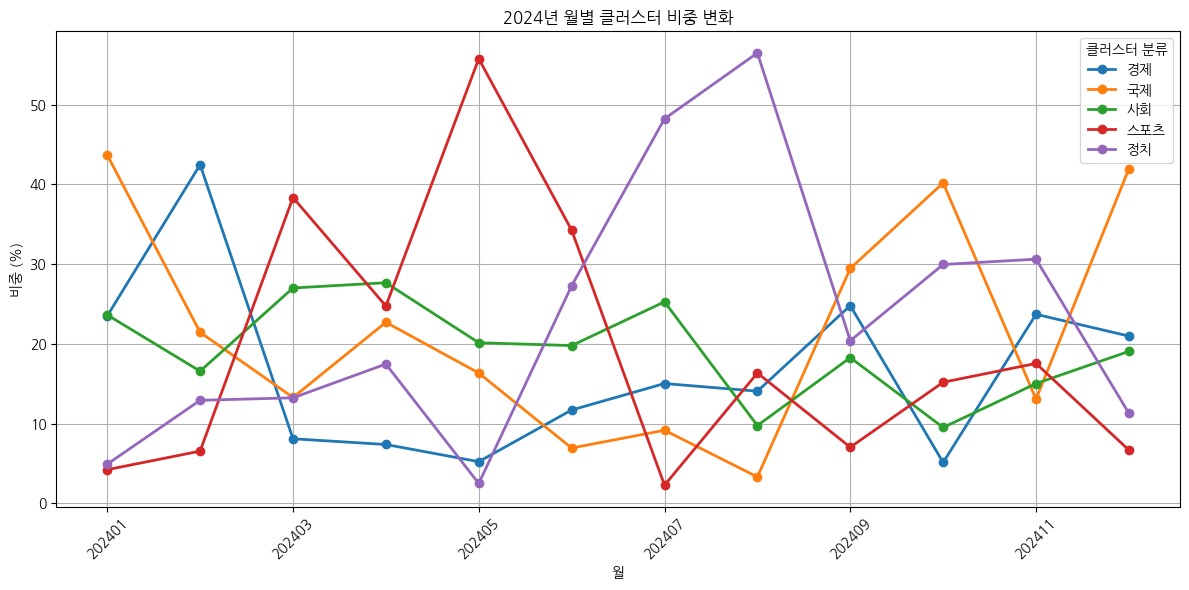

2024년 클러스터 비중 그래프 저장 완료: /content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)/cluster_trends_2024.png


In [14]:
CLUSTER_NAMES = {
  0: "정치",
  1: "국제",
  2: "경제",
  3: "사회",
  4: "스포츠",
  5: "IT_과학",
  6: "문화",
  7: "지역",
  8: "기타"
}

def load_data(output_folder):
  files = [f for f in os.listdir(output_folder) if f.startswith('clustered_') and f.endswith('.csv')]
  files.sort()

  data = []
  for file in files:
    file_path = os.path.join(output_folder, file)
    df = pd.read_csv(file_path)
    df['월'] = file.split('_')[1][:6]
    df['Cluster_Name'] = df['Cluster'].map(CLUSTER_NAMES)
    data.append(df)

  return pd.concat(data, ignore_index=True)


def calculate_proportions(df):
  cluster_proportions = (df.groupby(['월', 'Cluster_Name'])
    .size()
    .reset_index(name='기사 수')
    .pivot(index='월', columns='Cluster_Name', values='기사 수')
  )

  cluster_proportions = cluster_proportions.div(cluster_proportions.sum(axis=1), axis=0) * 100
  return cluster_proportions


def save_proportions_table(cluster_proportions, output_folder):
  for year in ['2022', '2023', '2024']:
    yearly_data = cluster_proportions[cluster_proportions.index.str.startswith(year)]
    if not yearly_data.empty:
      output_file = os.path.join(output_folder, f"cluster_proportions_{year}.csv")
      yearly_data.to_csv(output_file)
      print(f"{year}년 클러스터 비중 저장 완료: {output_file}")


def make_plot(cluster_proportions, output_folder):
  for year in ['2022', '2023', '2024']:
    yearly_data = cluster_proportions[cluster_proportions.index.str.startswith(year)]
    if not yearly_data.empty:
      plt.figure(figsize=(10, 6))
      yearly_data.plot(kind='line', marker='o', linewidth=2, figsize=(12, 6))
      plt.title(f"{year}년 월별 클러스터 비중 변화")
      plt.xlabel("월")
      plt.ylabel("비중 (%)")
      plt.xticks(rotation=45)
      plt.legend(title="클러스터 분류", loc='upper right')
      plt.grid()
      plt.tight_layout()

      graph_path = os.path.join(output_folder, f"cluster_trends_{year}.png")
      plt.savefig(graph_path)
      plt.show()
      print(f"{year}년 클러스터 비중 그래프 저장 완료: {graph_path}")


output_folder = "/content/drive/MyDrive/빅데이터_최종과제/분석 데이터(전처리 1)"
clustered_data = load_data(output_folder)
cluster_proportions = calculate_proportions(clustered_data)
save_proportions_table(cluster_proportions, output_folder)
make_plot(cluster_proportions, output_folder)